#Predicting Housing Values in Boston Suburbs Using Machine Learning Techniques

##1.Project Overview

This project focuses on predicting the median value of owner-occupied homes (`medv`) in the suburbs of Boston using various machine learning models. The dataset contains 333 observations and 12 features, capturing socio-economic and environmental factors that influence housing prices. By leveraging advanced machine learning techniques, this project aims to build an accurate predictive model and identify the most significant variables affecting housing values. The findings from this analysis will offer valuable insights to stakeholders, including real estate professionals and policymakers, guiding them in making data-driven decisions regarding property investments and urban development.



##2.Data Information

https://www.kaggle.com/c/boston-housing/data

The dataset used in this project consists of 333 rows and 12 columns, each representing various attributes of the housing and environment in Boston suburbs. The columns are as follows:

* **crim:** per capita crime rate by town.
* **zn:** proportion of residential land zoned for lots over 25,000 sq.ft.
* **indus:** proportion of non-retail business acres per town.
* **chas:** Charles River dummy variable (1 if the tract bounds the river; 0 otherwise).
* **nox:** nitrogen oxides concentration (parts per 10 million).
* **rm:** average number of rooms per dwelling.
* **age:** proportion of owner-occupied units built prior to 1940.
* **dis:** weighted mean of distances to five Boston employment centers.
* **rad:** index of accessibility to radial highways.
* **tax:** full-value property-tax rate per $10,000.
* **ptratio:** pupil-teacher ratio by town.
* **black:** 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

* **lstat:** lower status of the population (percent).
* **medv:** median value of owner-occupied homes in $1000s (target variable).




##3.Data Inspecting and Preprocessing

In [1]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 4.9 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge, HuberRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import TheilSenRegressor, RANSACRegressor
from sklearn.linear_model import QuantileRegressor
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

####Loading Data

In [3]:
from google.colab import files
uploaded = files.upload()

Saving boston_data.csv to boston_data.csv


In [4]:
# Loading the dataset
file_path = 'boston_data.csv'
df = pd.read_csv(file_path)
df.head()

ID  indus  chas    nox     rm   age     dis  rad  tax  ptratio  lstat  medv
0   1   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   4.98  24.0
1   2   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   9.14  21.6
2   4   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   2.94  33.4
3   5   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   5.33  36.2
4   7   7.87     0  0.524  6.012  66.6  5.5605    5  311     15.2  12.43  22.9

In [5]:
# Check its rows and columns
df.shape

(333, 12)

In [6]:
# Check its duplication
df.duplicated().sum()

0

In [7]:
df.describe()

ID       indus        chas         nox          rm         age  \
count  333.000000  333.000000  333.000000  333.000000  333.000000  333.000000   
mean   250.951952   11.293483    0.060060    0.557144    6.265619   68.226426   
std    147.859438    6.998123    0.237956    0.114955    0.703952   28.133344   
min      1.000000    0.740000    0.000000    0.385000    3.561000    6.000000   
25%    123.000000    5.130000    0.000000    0.453000    5.884000   45.400000   
50%    244.000000    9.900000    0.000000    0.538000    6.202000   76.700000   
75%    377.000000   18.100000    0.000000    0.631000    6.595000   93.800000   
max    506.000000   27.740000    1.000000    0.871000    8.725000  100.000000   

              dis         rad         tax     ptratio       lstat        medv  
count  333.000000  333.000000  333.000000  333.000000  333.000000  333.000000  
mean     3.709934    9.633634  409.279279   18.448048   12.515435   22.768769  
std      1.981123    8.742174  170.841988    2.151821    7.067781    9.173468  
min      1.129600    1.000000  188.000000   12.600000    1.730000    5.000000  
25%      2.122400    4.000000  279.000000   17.400000    7.180000   17.400000  
50%      3.092300    5.000000  330.000000   19.000000   10.970000   21.600000  
75%      5.116700   24.000000  666.000000   20.200000   16.420000   25.000000  
max     10.710300   24.000000  711.000000   21.200000   37.970000   50.000000

In [8]:
# Check its information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       333 non-null    int64  
 1   indus    333 non-null    float64
 2   chas     333 non-null    int64  
 3   nox      333 non-null    float64
 4   rm       333 non-null    float64
 5   age      333 non-null    float64
 6   dis      333 non-null    float64
 7   rad      333 non-null    int64  
 8   tax      333 non-null    int64  
 9   ptratio  333 non-null    float64
 10  lstat    333 non-null    float64
 11  medv     333 non-null    float64
dtypes: float64(8), int64(4)
memory usage: 31.3 KB


In [9]:
# Check its missing values
df.isnull().sum()

ID         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
lstat      0
medv       0
dtype: int64

In [10]:
# Check its duplication
df.duplicated().sum()

0

##4.Exploratory Data Analysis (EDA)

###Correlation Heatmap

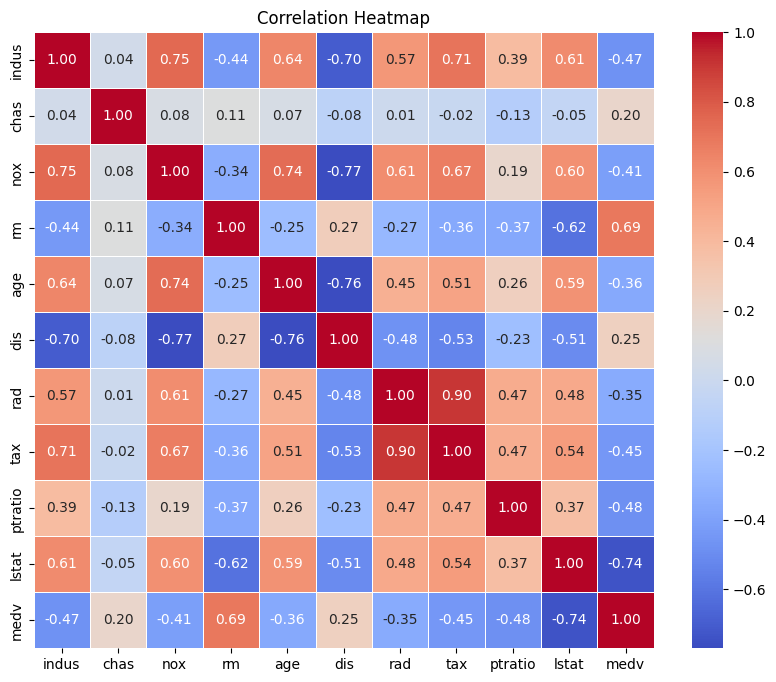

In [11]:
corr_df = df.drop(columns=['ID'])
corr_matrix = corr_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

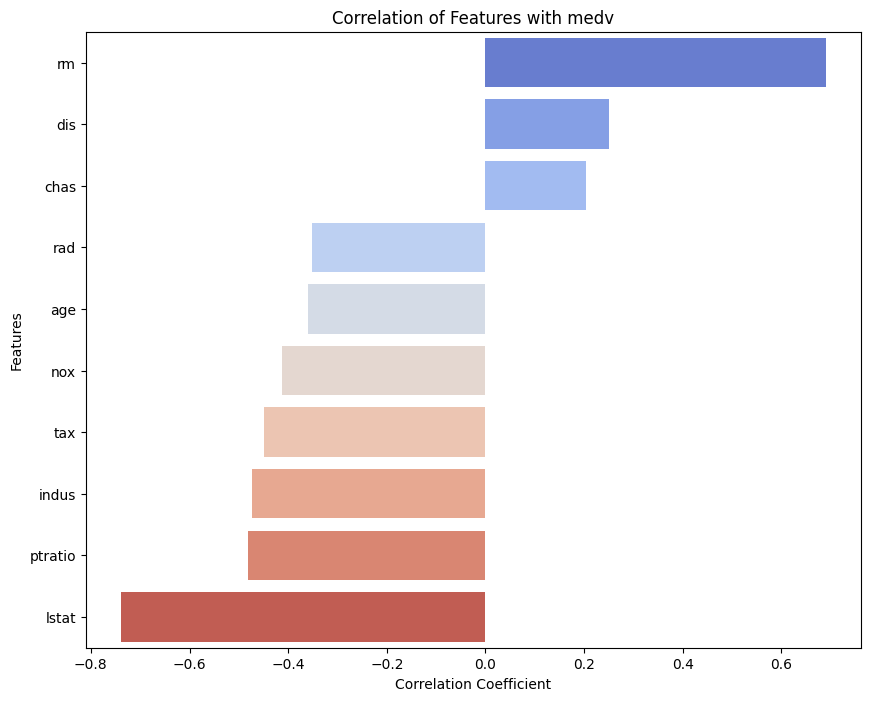

In [12]:
corr_with_medv = corr_df.corr()['medv'].drop('medv').sort_values(ascending=False)
# Plotting the bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x=corr_with_medv.values, y=corr_with_medv.index, palette='coolwarm')
plt.title("Correlation of Features with medv")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.show()

###Pairplot

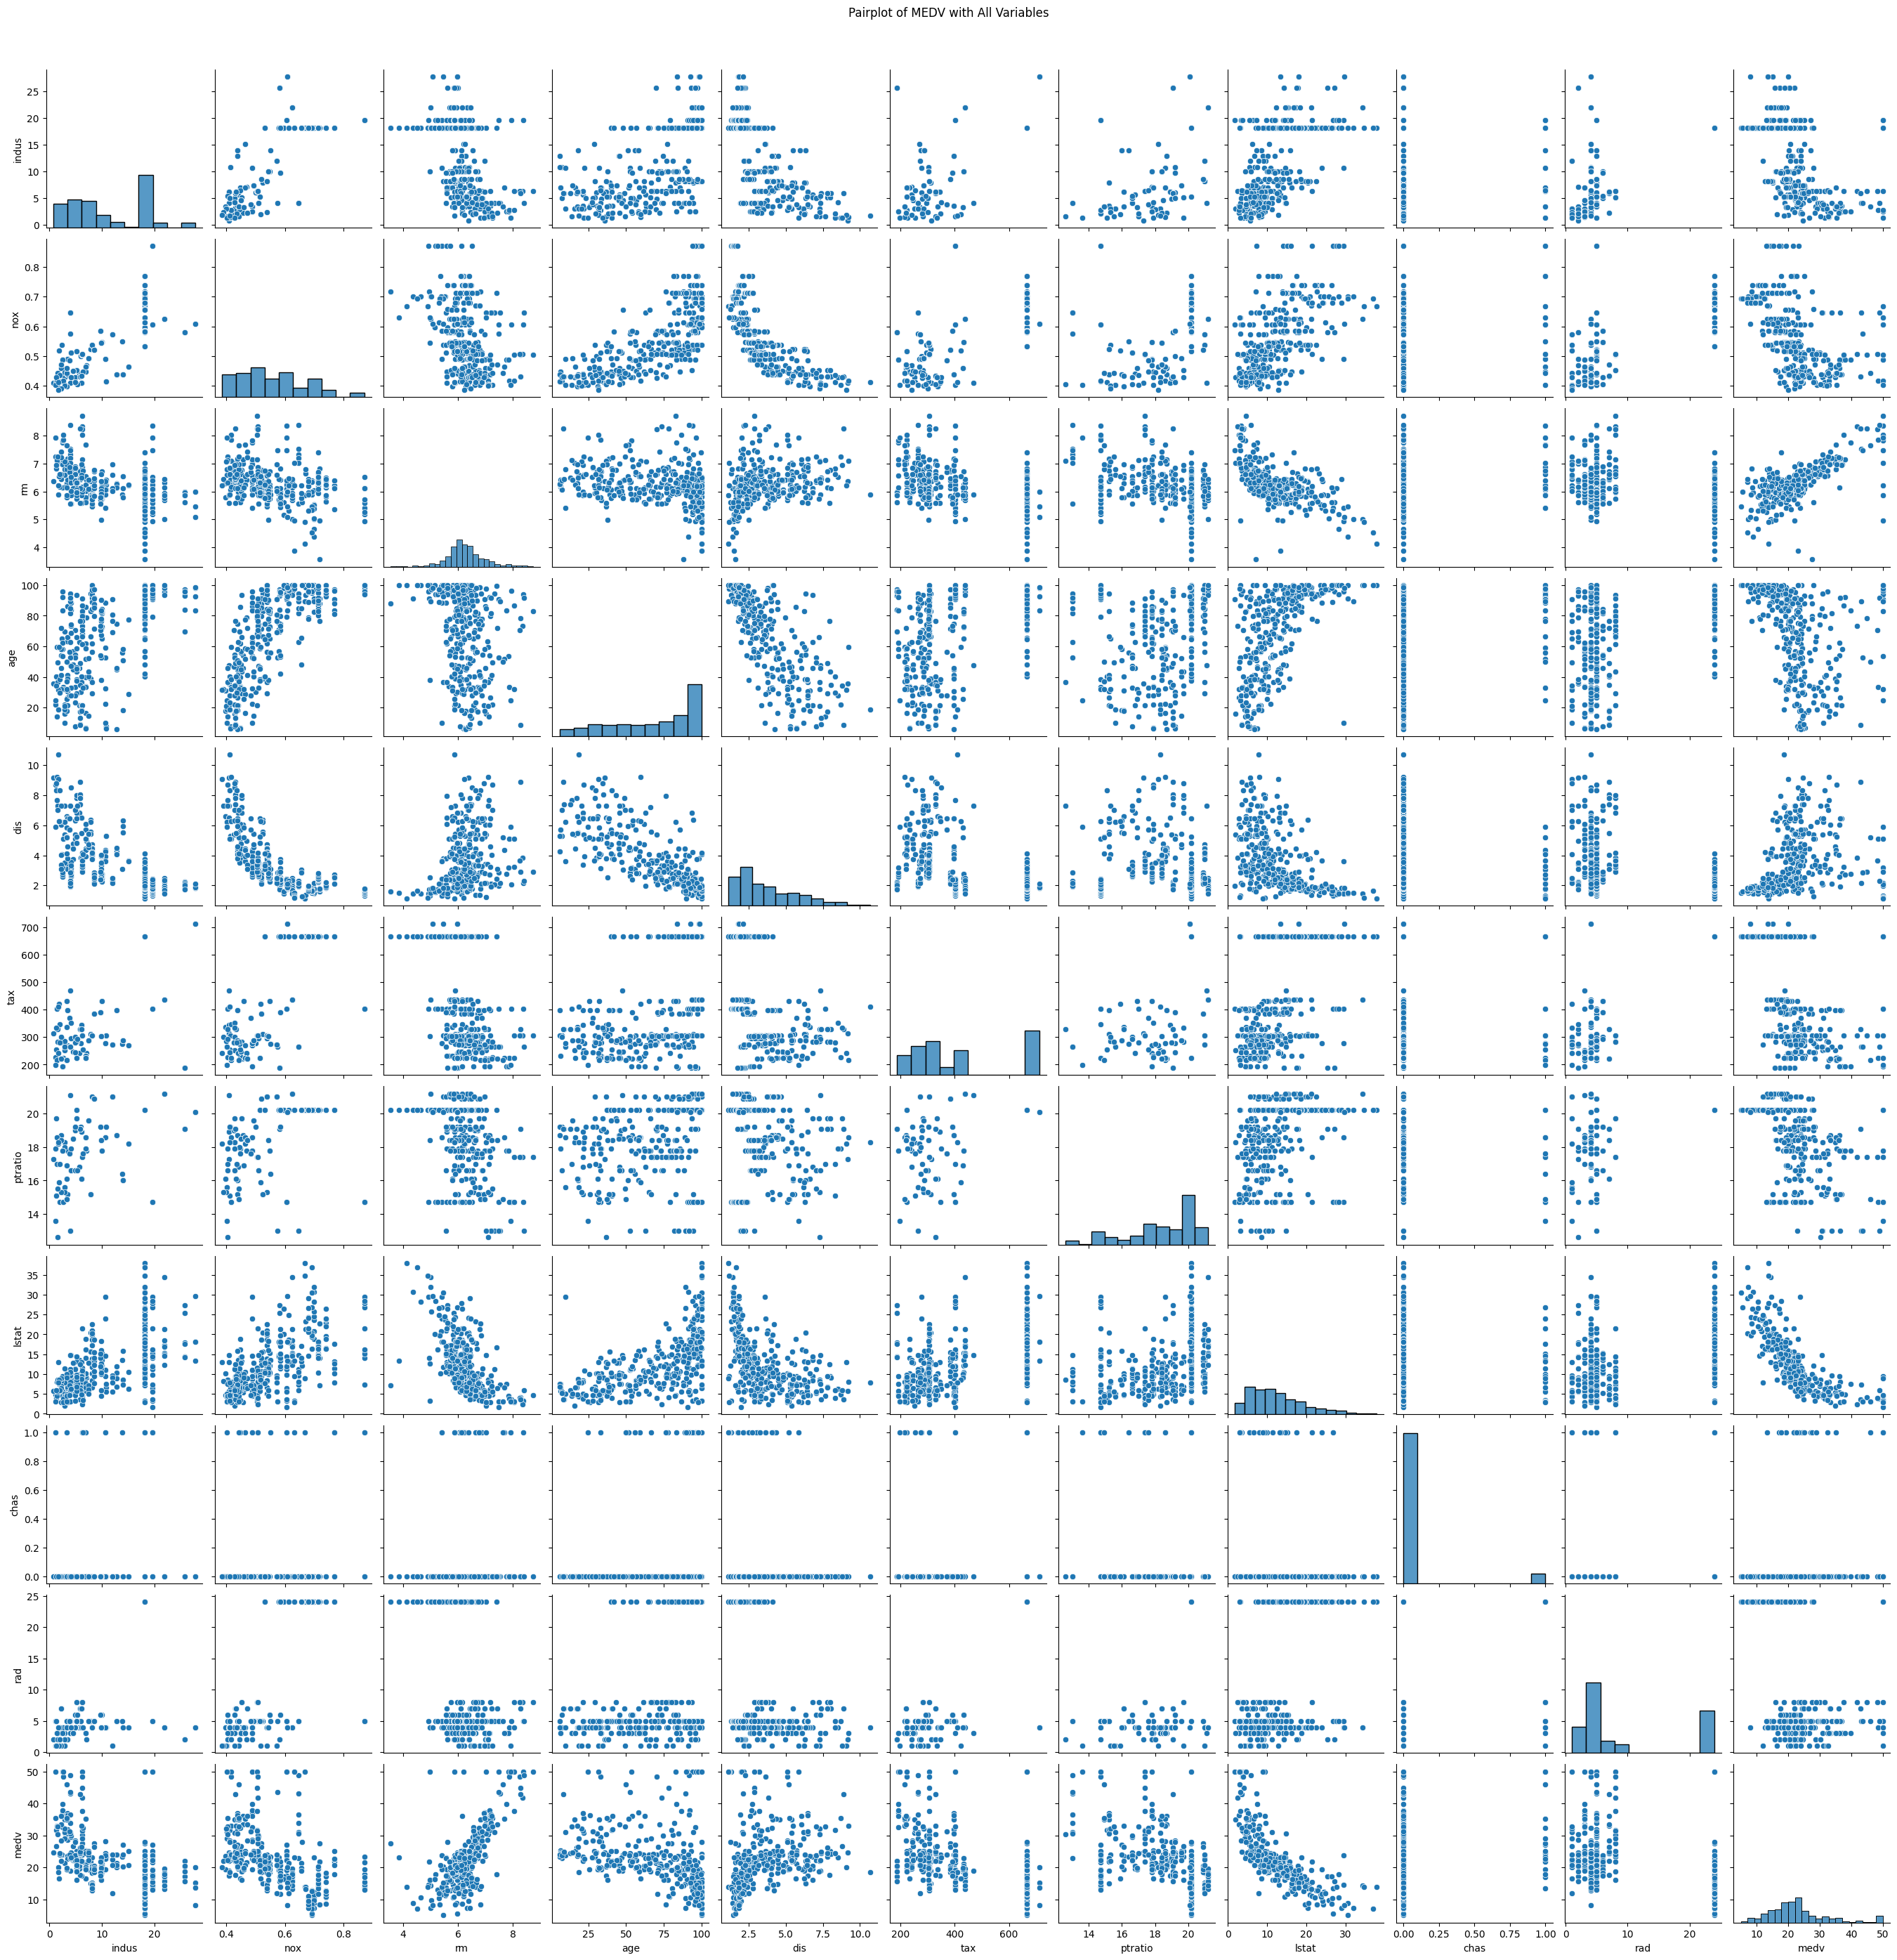

In [13]:
# Pairplot of medv with all variables
pairplot = sns.pairplot(df, vars=['indus', 'nox', 'rm', 'age', 'dis', 'tax', 'ptratio', 'lstat','chas', 'rad','medv'])
pairplot.fig.suptitle('Pairplot of MEDV with All Variables', y=1.02)  # y=1.02 adjusts the title position
plt.show()

###medv (Target Variable)

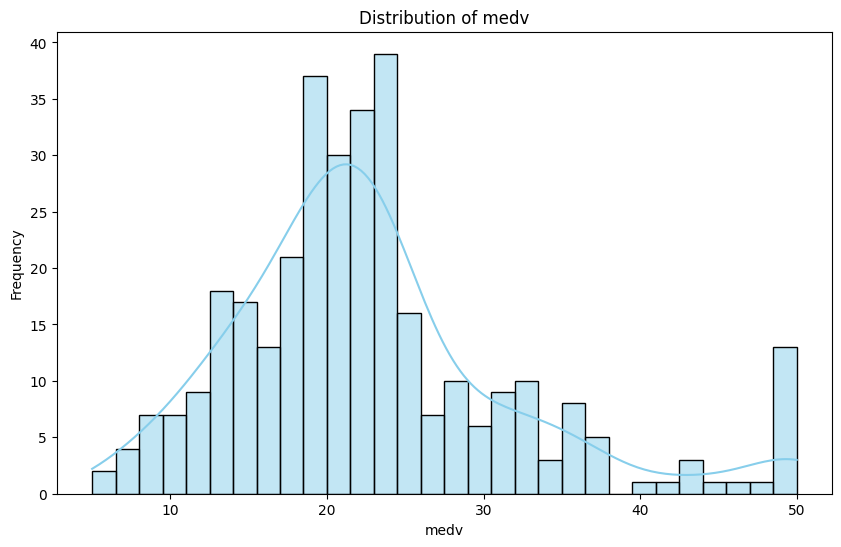

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df['medv'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of medv")
plt.xlabel("medv")
plt.ylabel("Frequency")
plt.show()

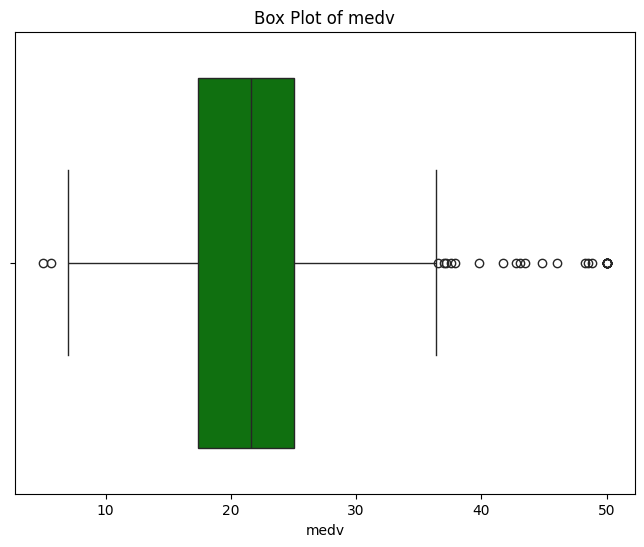

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['medv'], color='green')
plt.title("Box Plot of medv")
plt.xlabel("medv")
plt.show()

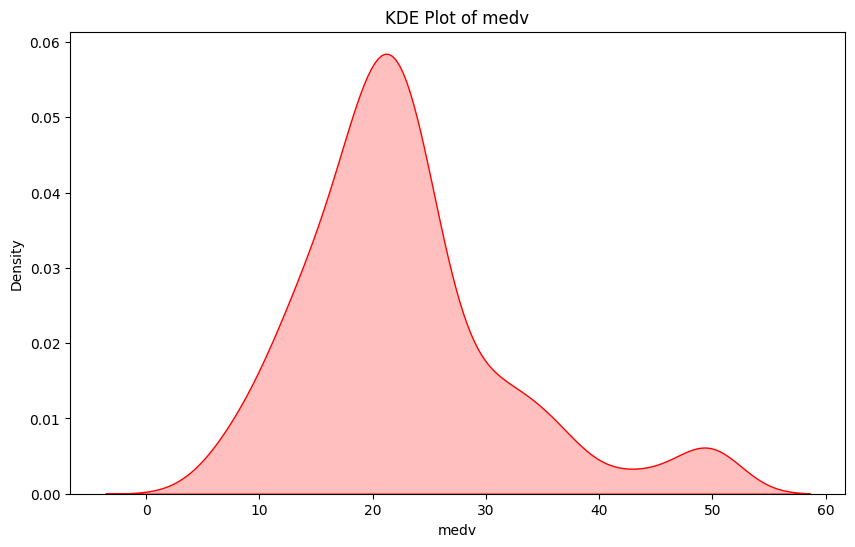

In [16]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['medv'], shade=True, color='red')
plt.title("KDE Plot of medv")
plt.xlabel("medv")
plt.ylabel("Density")
plt.show()

###indus

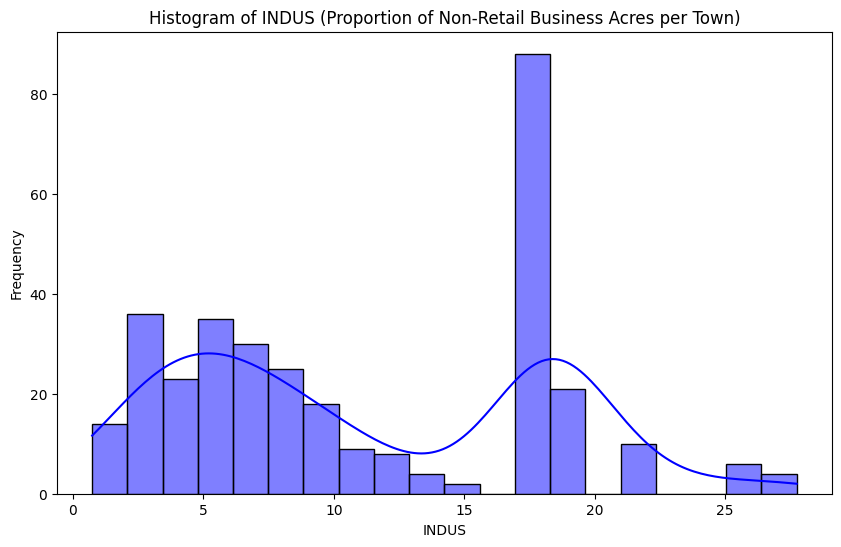

In [17]:
# Create a histogram to show the distribution of 'indus'
plt.figure(figsize=(10, 6))
sns.histplot(df['indus'], bins=20, kde=True, color='blue')
plt.title("Histogram of INDUS (Proportion of Non-Retail Business Acres per Town)")
plt.xlabel("INDUS")
plt.ylabel("Frequency")
plt.show()

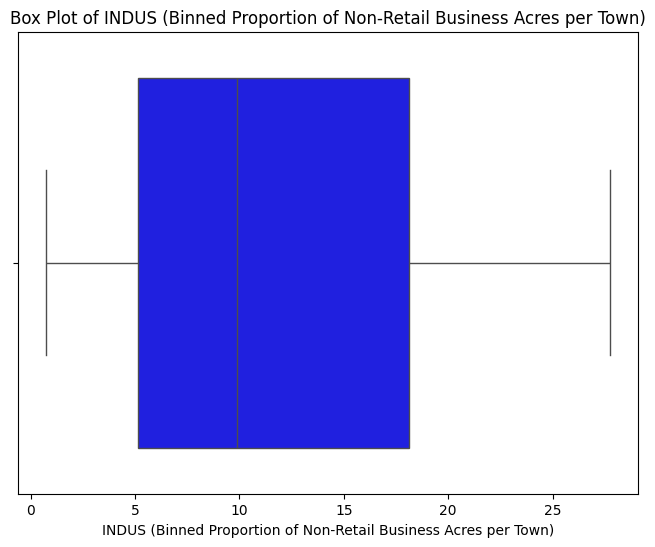

In [18]:
# Box plot to show the distribution of 'indus'
plt.figure(figsize=(8, 6))
sns.boxplot(x='indus', data=df, color='blue')
plt.title("Box Plot of INDUS (Binned Proportion of Non-Retail Business Acres per Town)")
plt.xlabel("INDUS (Binned Proportion of Non-Retail Business Acres per Town)")
plt.show()

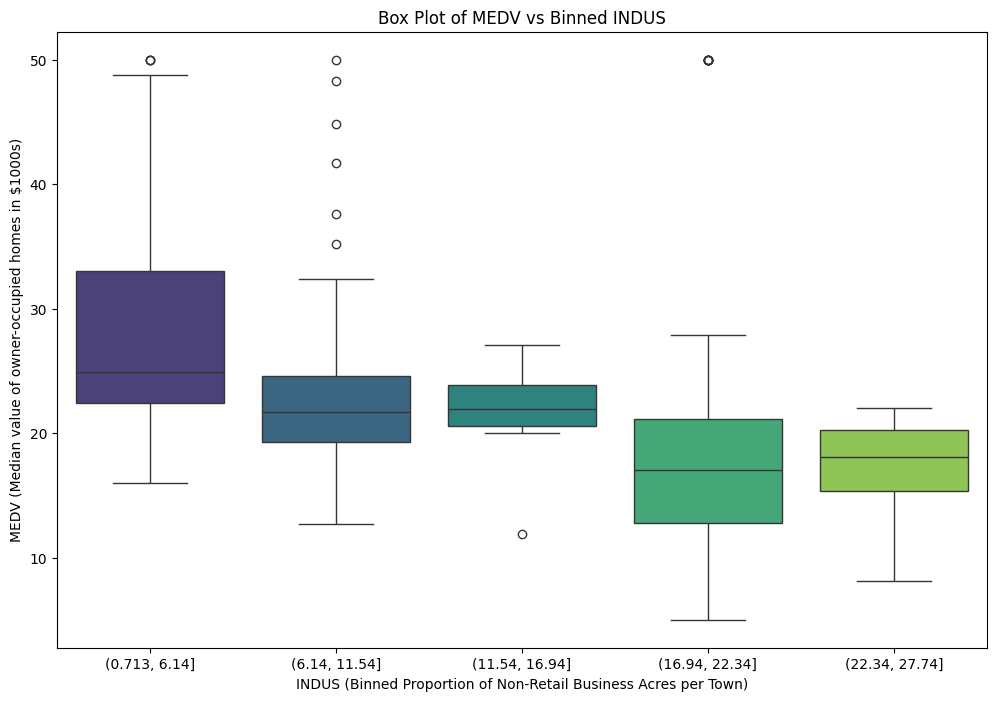

In [19]:
# Bin the 'indus' variable into discrete categories
df['indus_binned'] = pd.cut(df['indus'], bins=5)

# Create a box plot to show the distribution of 'medv' across binned 'indus'
plt.figure(figsize=(12, 8))
sns.boxplot(x='indus_binned', y='medv', data=df, palette='viridis')
plt.title("Box Plot of MEDV vs Binned INDUS")
plt.xlabel("INDUS (Binned Proportion of Non-Retail Business Acres per Town)")
plt.ylabel("MEDV (Median value of owner-occupied homes in $1000s)")
plt.show()

In [20]:
df.drop(columns=['indus_binned'], inplace=True)

In [21]:
df.columns

Index(['ID', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

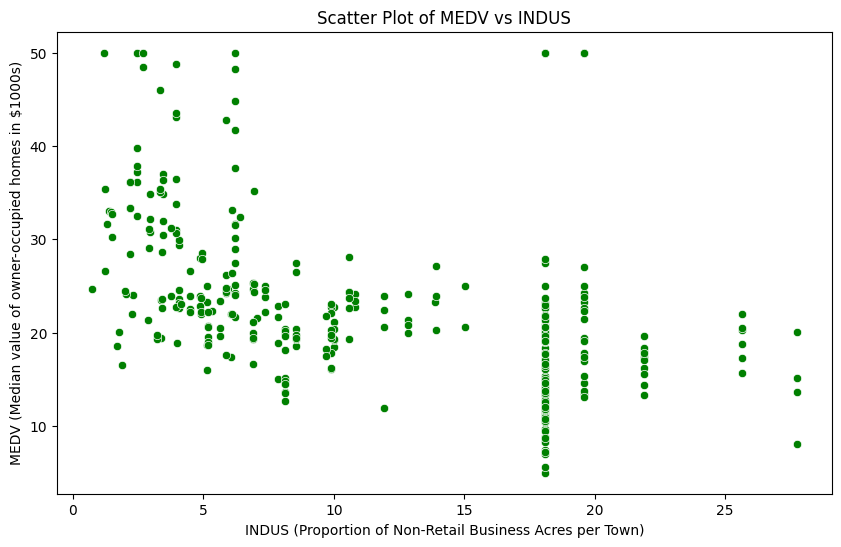

In [22]:
# Scatter plot to show the relationship between 'indus' and 'medv'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='indus', y='medv', data=df, color='green')
plt.title("Scatter Plot of MEDV vs INDUS")
plt.xlabel("INDUS (Proportion of Non-Retail Business Acres per Town)")
plt.ylabel("MEDV (Median value of owner-occupied homes in $1000s)")
plt.show()

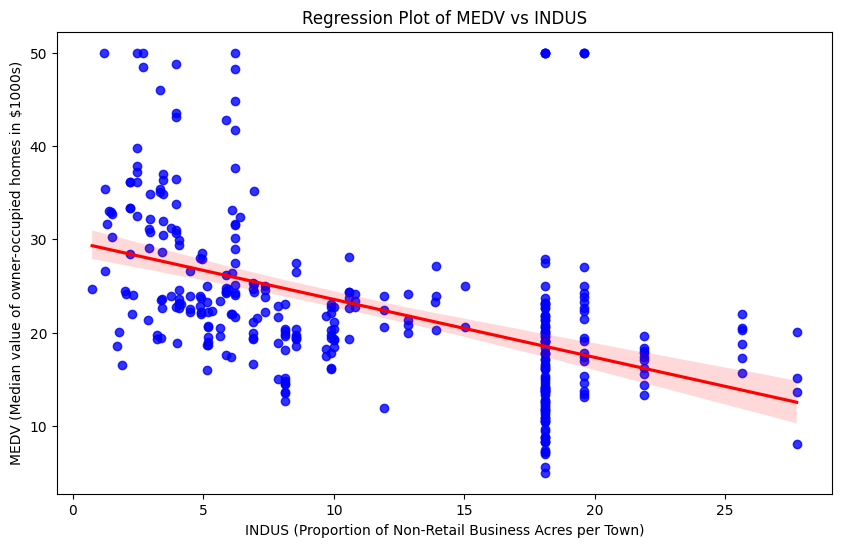

In [23]:
# Regression plot to show the relationship between 'indus' and 'medv'
plt.figure(figsize=(10, 6))
sns.regplot(x='indus', y='medv', data=df, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title("Regression Plot of MEDV vs INDUS")
plt.xlabel("INDUS (Proportion of Non-Retail Business Acres per Town)")
plt.ylabel("MEDV (Median value of owner-occupied homes in $1000s)")
plt.show()

###chas

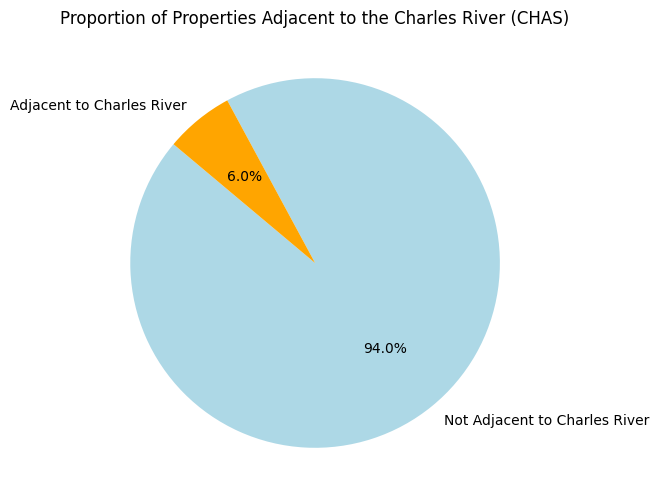

In [24]:
# Pie chart to show the distribution of 'chas'
chas_counts = df['chas'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(chas_counts, labels=['Not Adjacent to Charles River', 'Adjacent to Charles River'], autopct='%1.1f%%', startangle=140, colors=['lightblue', 'orange'])
plt.title("Proportion of Properties Adjacent to the Charles River (CHAS)")
plt.show()

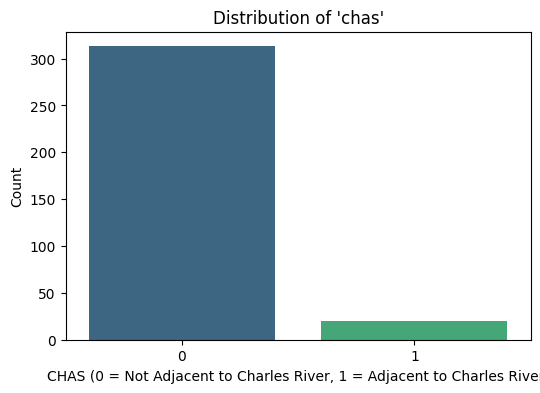

In [25]:
# Bar plot to show the distribution of 'chas'
plt.figure(figsize=(6, 4))
sns.countplot(x='chas', data=df, palette='viridis')
plt.title("Distribution of 'chas'")
plt.xlabel("CHAS (0 = Not Adjacent to Charles River, 1 = Adjacent to Charles River)")
plt.ylabel("Count")
plt.show()

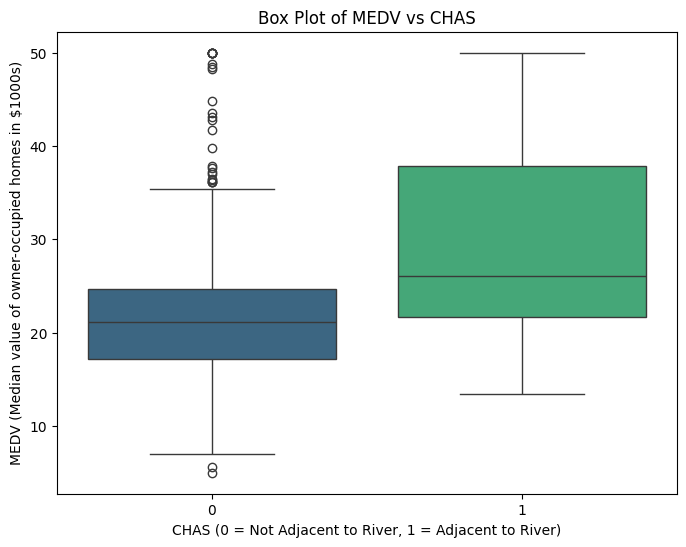

In [26]:
# Box plot to show the distribution of 'medv' across 'chas'
plt.figure(figsize=(8, 6))
sns.boxplot(x='chas', y='medv', data=df, palette='viridis')
plt.title("Box Plot of MEDV vs CHAS")
plt.xlabel("CHAS (0 = Not Adjacent to River, 1 = Adjacent to River)")
plt.ylabel("MEDV (Median value of owner-occupied homes in $1000s)")
plt.show()

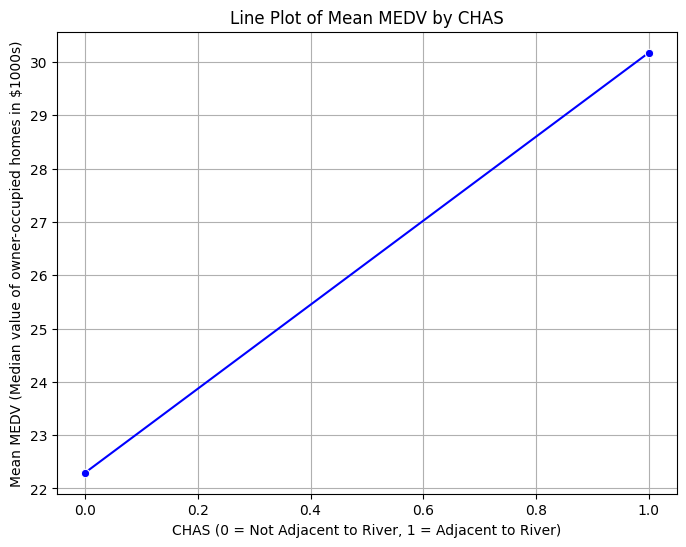

In [27]:
# Calculate the mean 'medv' for each 'chas' category
medv_means_chas = df.groupby('chas')['medv'].mean().reset_index()

# Create a line plot
plt.figure(figsize=(8, 6))
sns.lineplot(x='chas', y='medv', data=medv_means_chas, marker='o', color='blue')
plt.title("Line Plot of Mean MEDV by CHAS")
plt.xlabel("CHAS (0 = Not Adjacent to River, 1 = Adjacent to River)")
plt.ylabel("Mean MEDV (Median value of owner-occupied homes in $1000s)")
plt.grid(True)
plt.show()

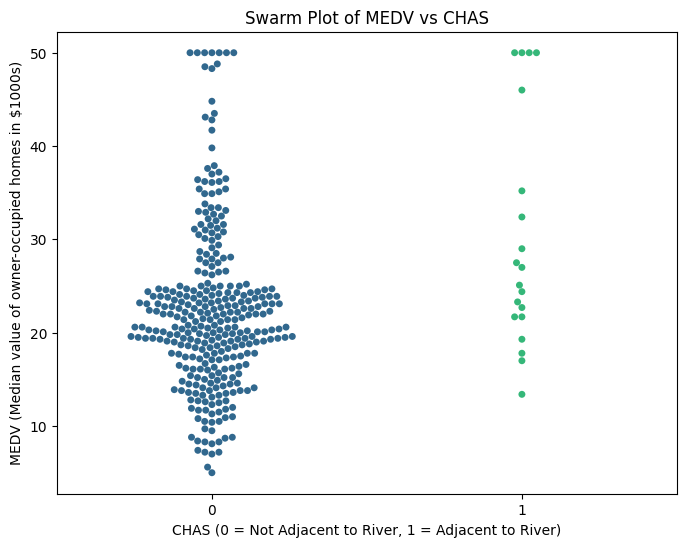

In [28]:
# Create a swarm plot to show the distribution of 'medv' across 'chas'
plt.figure(figsize=(8, 6))
sns.swarmplot(x='chas', y='medv', data=df, palette='viridis')
plt.title("Swarm Plot of MEDV vs CHAS")
plt.xlabel("CHAS (0 = Not Adjacent to River, 1 = Adjacent to River)")
plt.ylabel("MEDV (Median value of owner-occupied homes in $1000s)")
plt.show()

###nox

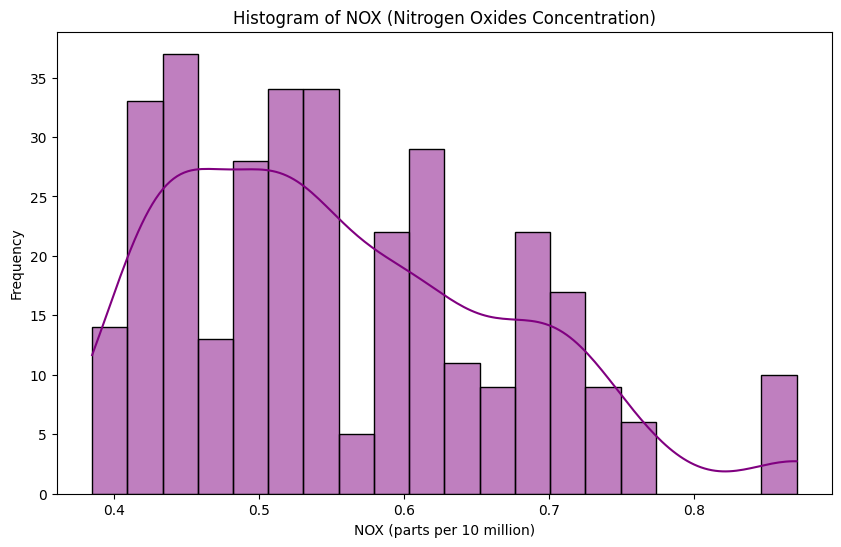

In [29]:
# Histogram to show the distribution of 'nox'
plt.figure(figsize=(10, 6))
sns.histplot(df['nox'], bins=20, kde=True, color='purple')
plt.title("Histogram of NOX (Nitrogen Oxides Concentration)")
plt.xlabel("NOX (parts per 10 million)")
plt.ylabel("Frequency")
plt.show()

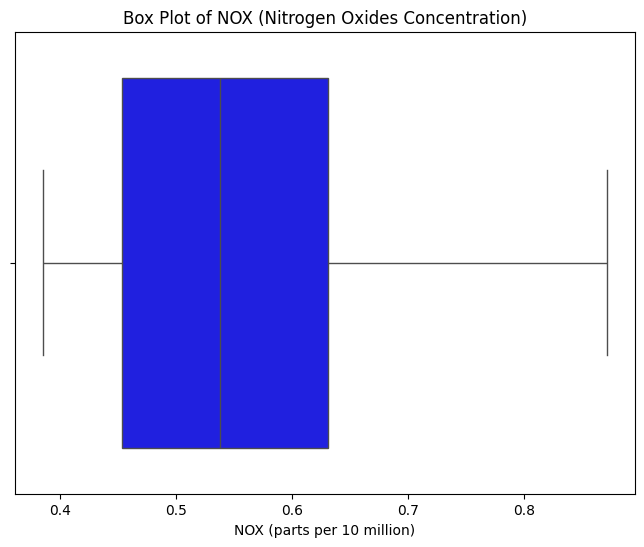

In [30]:
# Box plot to show the distribution of 'nox'
plt.figure(figsize=(8, 6))
sns.boxplot(x='nox', data=df, color='blue')
plt.title("Box Plot of NOX (Nitrogen Oxides Concentration)")
plt.xlabel("NOX (parts per 10 million)")
plt.show()

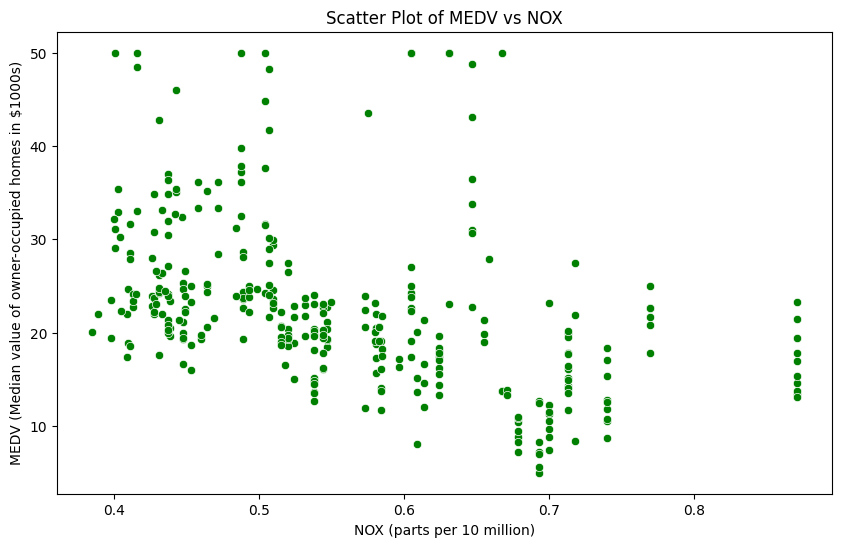

In [31]:
# Scatter plot to show the relationship between 'nox' and 'medv'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='nox', y='medv', data=df, color='green')
plt.title("Scatter Plot of MEDV vs NOX")
plt.xlabel("NOX (parts per 10 million)")
plt.ylabel("MEDV (Median value of owner-occupied homes in $1000s)")
plt.show()

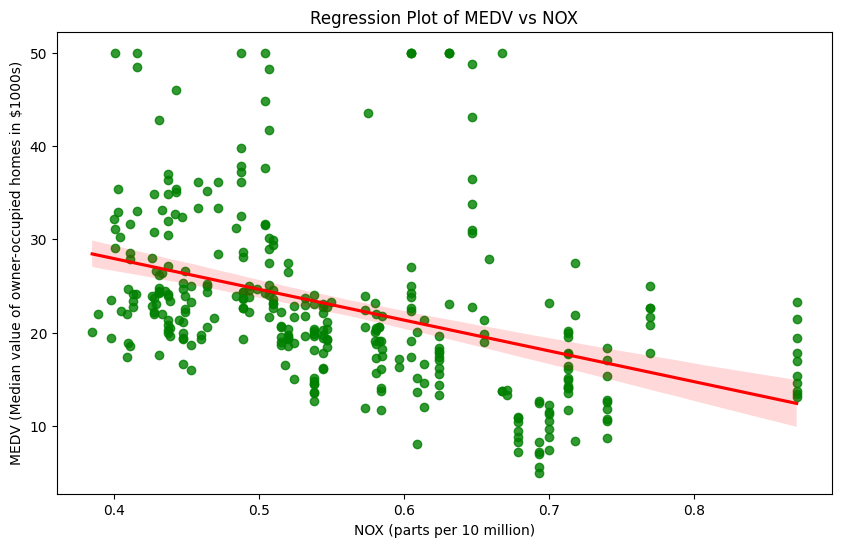

In [32]:
# Regression plot to show the relationship between 'nox' and 'medv'
plt.figure(figsize=(10, 6))
sns.regplot(x='nox', y='medv', data=df, scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.title("Regression Plot of MEDV vs NOX")
plt.xlabel("NOX (parts per 10 million)")
plt.ylabel("MEDV (Median value of owner-occupied homes in $1000s)")
plt.show()

###rm

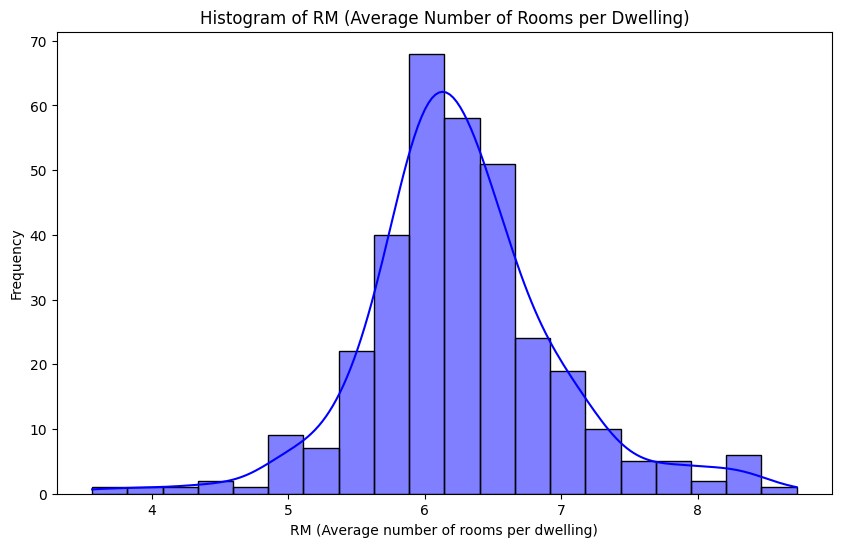

In [33]:
# Histogram to show the distribution of 'rm'
plt.figure(figsize=(10, 6))
sns.histplot(df['rm'], bins=20, kde=True, color='blue')
plt.title("Histogram of RM (Average Number of Rooms per Dwelling)")
plt.xlabel("RM (Average number of rooms per dwelling)")
plt.ylabel("Frequency")
plt.show()

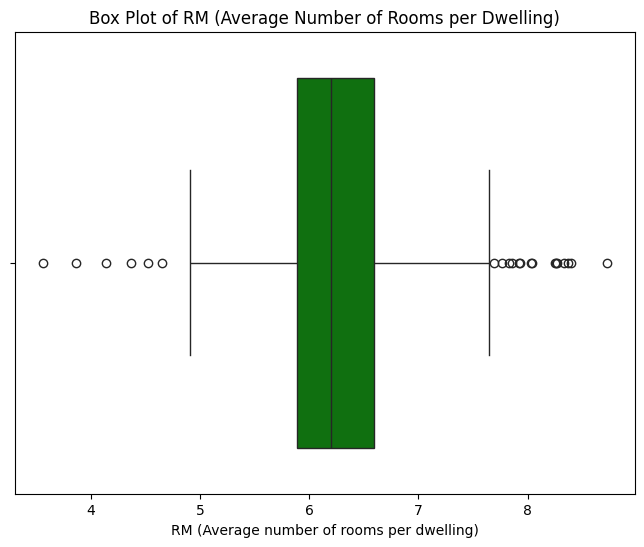

In [34]:
# Box plot to show the distribution of 'rm'
plt.figure(figsize=(8, 6))
sns.boxplot(x='rm', data=df, color='green')
plt.title("Box Plot of RM (Average Number of Rooms per Dwelling)")
plt.xlabel("RM (Average number of rooms per dwelling)")
plt.show()

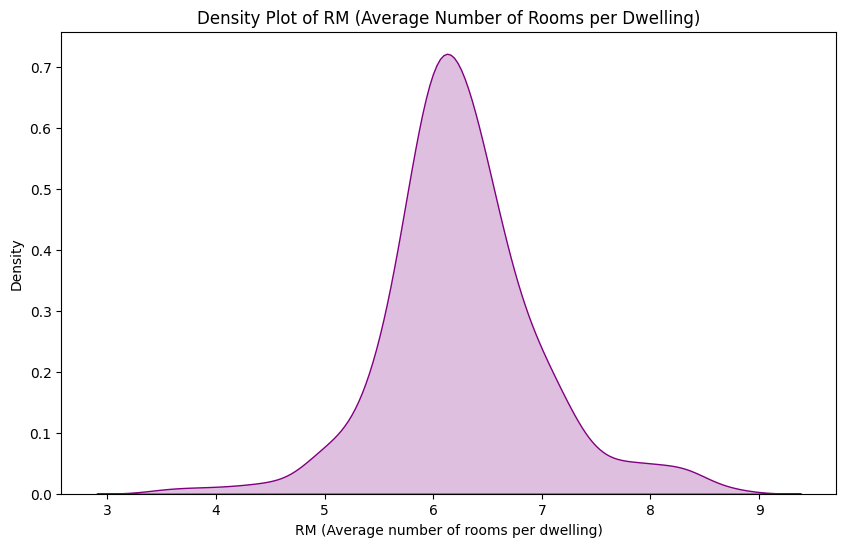

In [35]:
# Density plot to show the distribution of 'rm'
plt.figure(figsize=(10, 6))
sns.kdeplot(df['rm'], shade=True, color='purple')
plt.title("Density Plot of RM (Average Number of Rooms per Dwelling)")
plt.xlabel("RM (Average number of rooms per dwelling)")
plt.ylabel("Density")
plt.show()

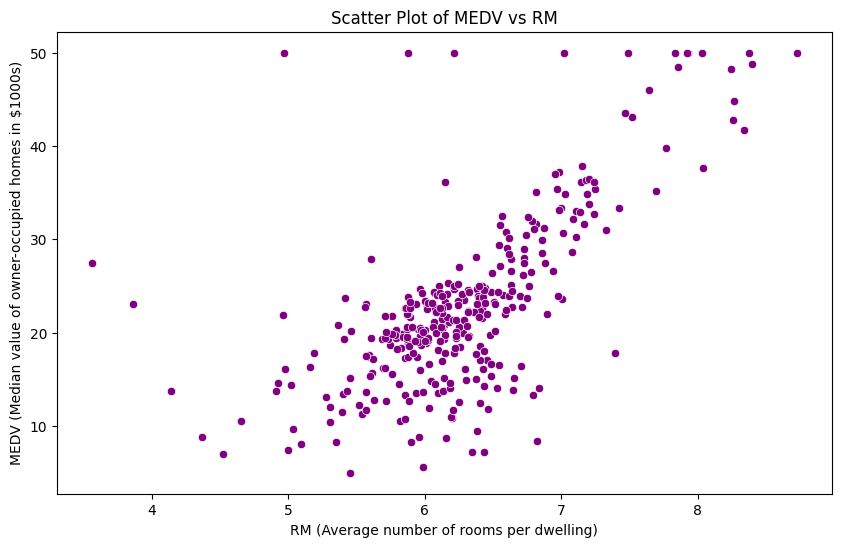

In [36]:
# Scatter plot to show the relationship between 'rm' and 'medv'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rm', y='medv', data=df, color='purple')
plt.title("Scatter Plot of MEDV vs RM")
plt.xlabel("RM (Average number of rooms per dwelling)")
plt.ylabel("MEDV (Median value of owner-occupied homes in $1000s)")
plt.show()

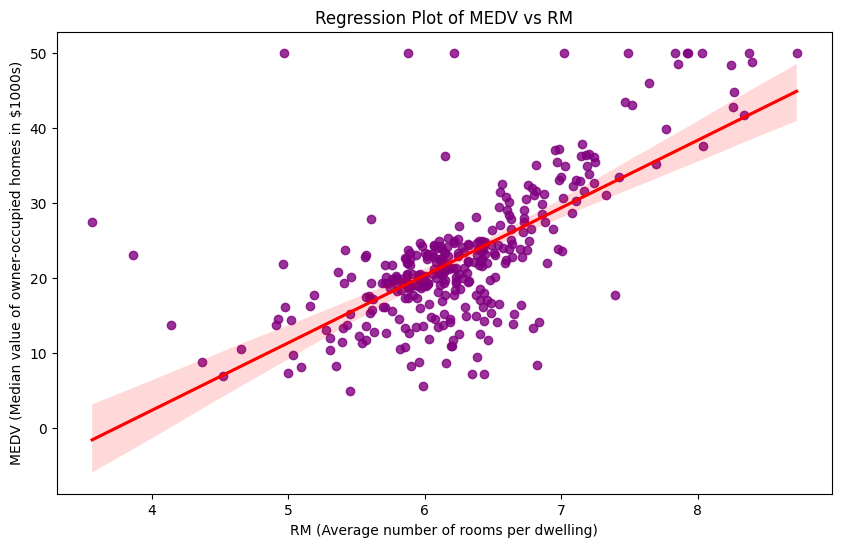

In [37]:
# Regression plot to show the relationship between 'rm' and 'medv'
plt.figure(figsize=(10, 6))
sns.regplot(x='rm', y='medv', data=df, scatter_kws={"color": "purple"}, line_kws={"color": "red"})
plt.title("Regression Plot of MEDV vs RM")
plt.xlabel("RM (Average number of rooms per dwelling)")
plt.ylabel("MEDV (Median value of owner-occupied homes in $1000s)")
plt.show()

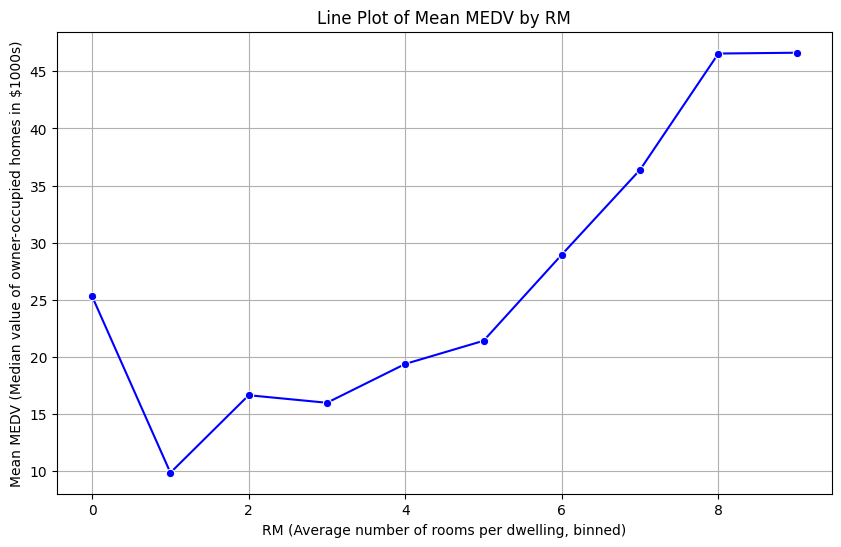

In [38]:
# Bin the 'rm' variable into discrete categories
df['rm_binned'] = pd.cut(df['rm'], bins=10, labels=False) # Use labels=False to get numeric bin identifiers

# Calculate the mean 'medv' for each 'rm' bin
medv_means_rm = df.groupby('rm_binned')['medv'].mean().reset_index()

# Create a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='rm_binned', y='medv', data=medv_means_rm, marker='o', color='blue')
plt.title("Line Plot of Mean MEDV by RM")
plt.xlabel("RM (Average number of rooms per dwelling, binned)")
plt.ylabel("Mean MEDV (Median value of owner-occupied homes in $1000s)")
plt.grid(True)
plt.show()

In [39]:
df.drop(columns=['rm_binned'], inplace=True)

In [40]:
df.columns

Index(['ID', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

###age

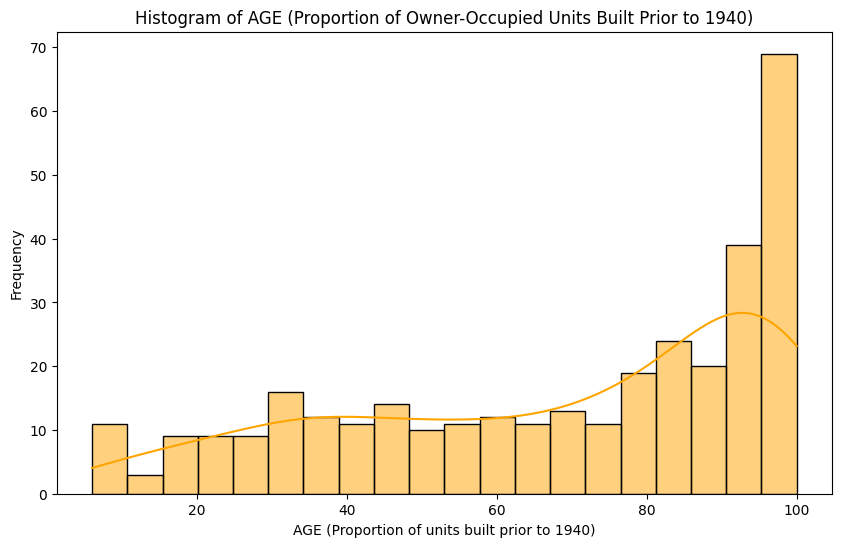

In [41]:
# Histogram to show the distribution of 'age'
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True, color='orange')
plt.title("Histogram of AGE (Proportion of Owner-Occupied Units Built Prior to 1940)")
plt.xlabel("AGE (Proportion of units built prior to 1940)")
plt.ylabel("Frequency")
plt.show()

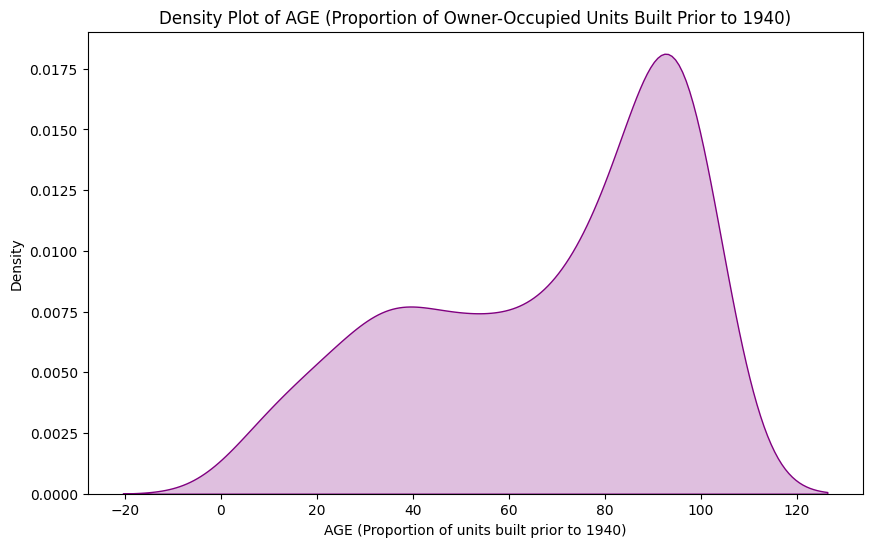

In [42]:
# Density plot to show the distribution of 'age'
plt.figure(figsize=(10, 6))
sns.kdeplot(df['age'], shade=True, color='purple')
plt.title("Density Plot of AGE (Proportion of Owner-Occupied Units Built Prior to 1940)")
plt.xlabel("AGE (Proportion of units built prior to 1940)")
plt.ylabel("Density")
plt.show()

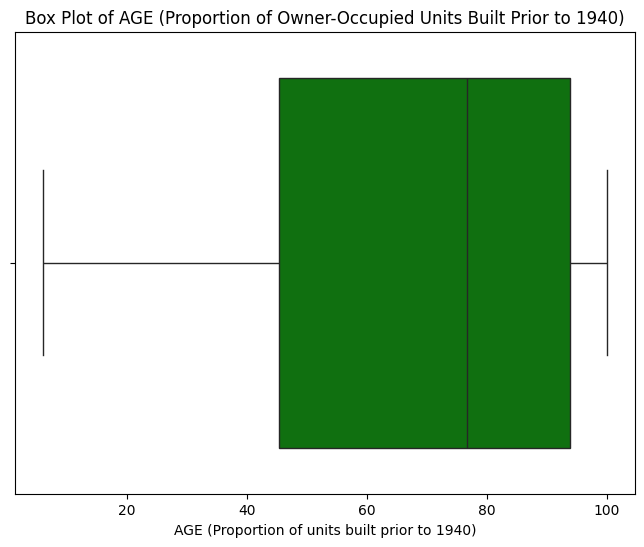

In [43]:
# Box plot to show the distribution of 'age'
plt.figure(figsize=(8, 6))
sns.boxplot(x='age', data=df, color='green')
plt.title("Box Plot of AGE (Proportion of Owner-Occupied Units Built Prior to 1940)")
plt.xlabel("AGE (Proportion of units built prior to 1940)")
plt.show()

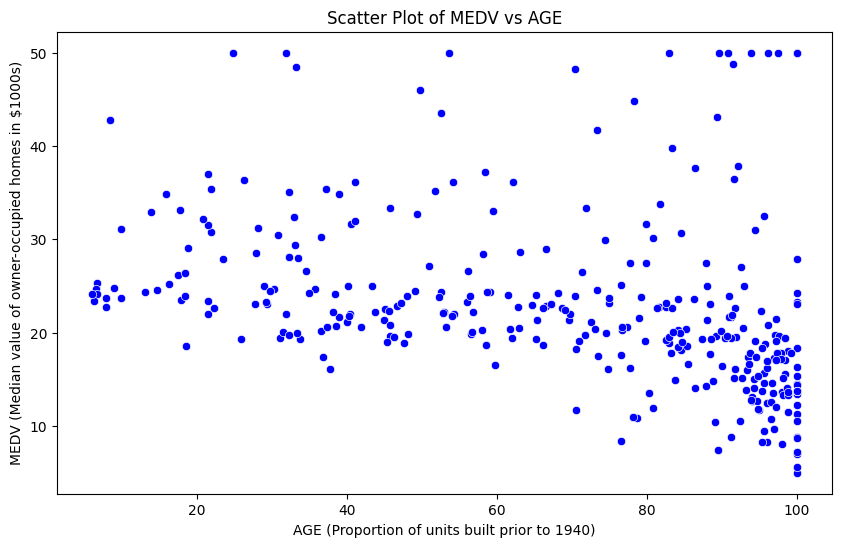

In [44]:
# Scatter plot to show the relationship between 'age' and 'medv'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='medv', data=df, color='blue')
plt.title("Scatter Plot of MEDV vs AGE")
plt.xlabel("AGE (Proportion of units built prior to 1940)")
plt.ylabel("MEDV (Median value of owner-occupied homes in $1000s)")
plt.show()

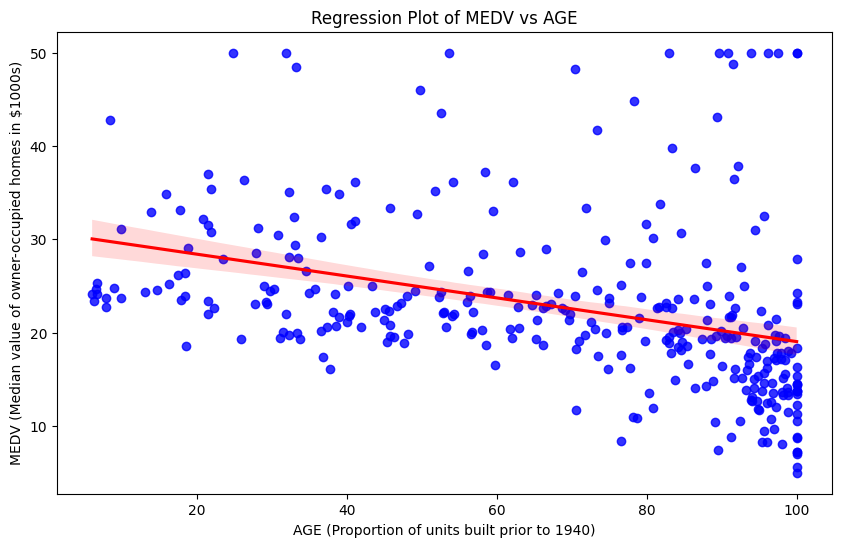

In [45]:
# Regression plot to show the relationship between 'age' and 'medv'
plt.figure(figsize=(10, 6))
sns.regplot(x='age', y='medv', data=df, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title("Regression Plot of MEDV vs AGE")
plt.xlabel("AGE (Proportion of units built prior to 1940)")
plt.ylabel("MEDV (Median value of owner-occupied homes in $1000s)")
plt.show()

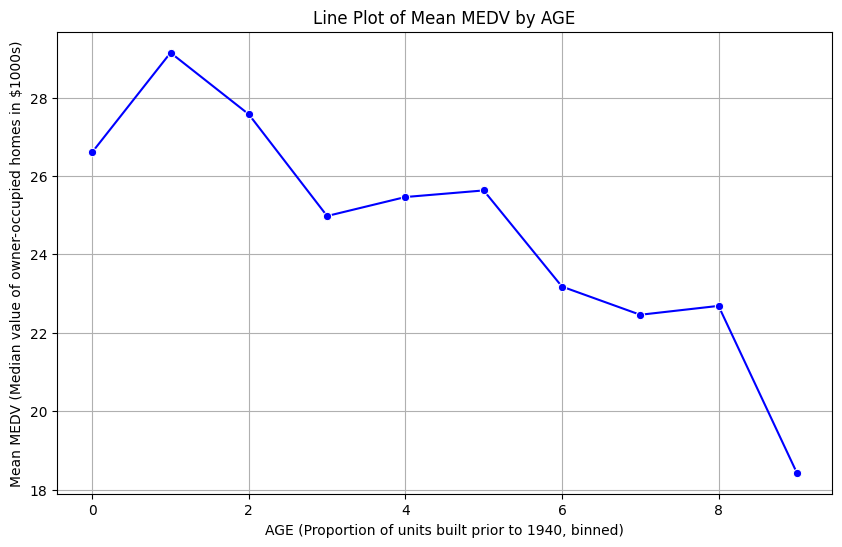

In [46]:
# Bin the 'age' variable into discrete categories
df['age_binned'] = pd.cut(df['age'], bins=10, labels=False) # Assign numerical labels to bins

# Calculate the mean 'medv' for each 'age' bin
medv_means_age = df.groupby('age_binned')['medv'].mean().reset_index()

# Create a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='age_binned', y='medv', data=medv_means_age, marker='o', color='blue')
plt.title("Line Plot of Mean MEDV by AGE")
plt.xlabel("AGE (Proportion of units built prior to 1940, binned)")
plt.ylabel("Mean MEDV (Median value of owner-occupied homes in $1000s)")
plt.grid(True)  # Add a grid for better readability
plt.show()

In [47]:
df.drop(columns=['age_binned'], inplace=True)

In [48]:
df.columns

Index(['ID', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

###dis

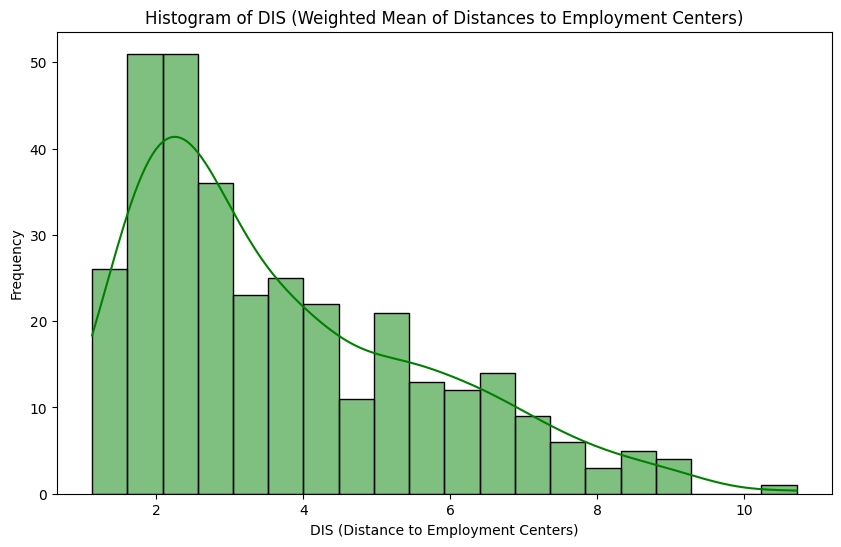

In [49]:
# Histogram to show the distribution of 'dis'
plt.figure(figsize=(10, 6))
sns.histplot(df['dis'], bins=20, kde=True, color='green')
plt.title("Histogram of DIS (Weighted Mean of Distances to Employment Centers)")
plt.xlabel("DIS (Distance to Employment Centers)")
plt.ylabel("Frequency")
plt.show()

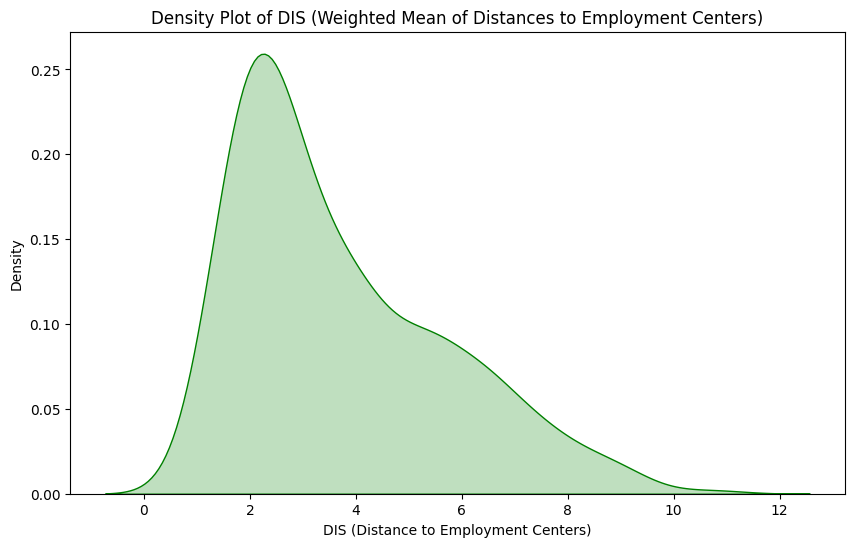

In [50]:
# Density plot to show the distribution of 'dis'
plt.figure(figsize=(10, 6))
sns.kdeplot(df['dis'], shade=True, color='green')
plt.title("Density Plot of DIS (Weighted Mean of Distances to Employment Centers)")
plt.xlabel("DIS (Distance to Employment Centers)")
plt.ylabel("Density")
plt.show()

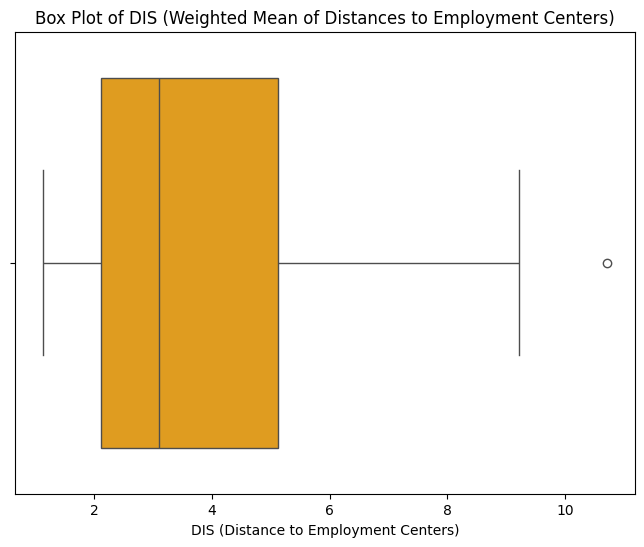

In [51]:
# Box plot to show the distribution of 'dis'
plt.figure(figsize=(8, 6))
sns.boxplot(x='dis', data=df, color='orange')
plt.title("Box Plot of DIS (Weighted Mean of Distances to Employment Centers)")
plt.xlabel("DIS (Distance to Employment Centers)")
plt.show()

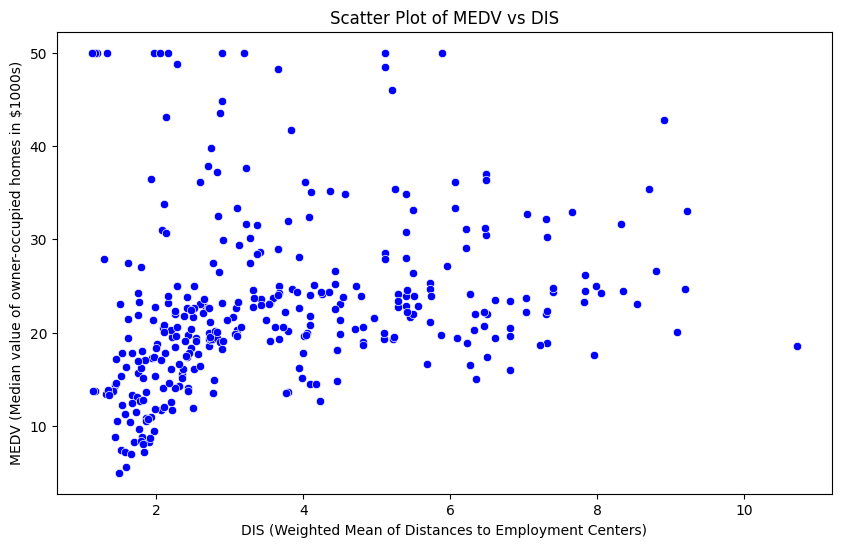

In [52]:
# Scatter plot to show the relationship between 'dis' and 'medv'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='dis', y='medv', data=df, color='blue')
plt.title("Scatter Plot of MEDV vs DIS")
plt.xlabel("DIS (Weighted Mean of Distances to Employment Centers)")
plt.ylabel("MEDV (Median value of owner-occupied homes in $1000s)")
plt.show()

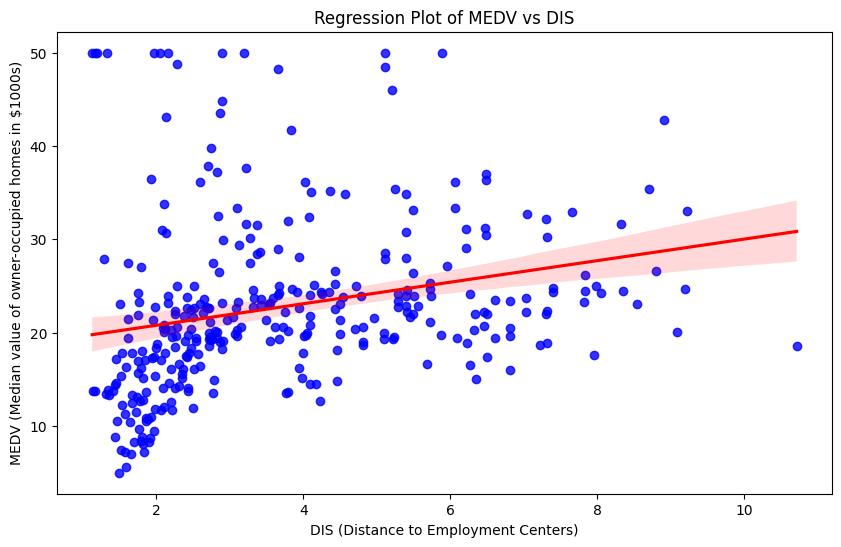

In [53]:
# Regression plot to show the relationship between 'dis' and 'medv'
plt.figure(figsize=(10, 6))
sns.regplot(x='dis', y='medv', data=df, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title("Regression Plot of MEDV vs DIS")
plt.xlabel("DIS (Distance to Employment Centers)")
plt.ylabel("MEDV (Median value of owner-occupied homes in $1000s)")
plt.show()

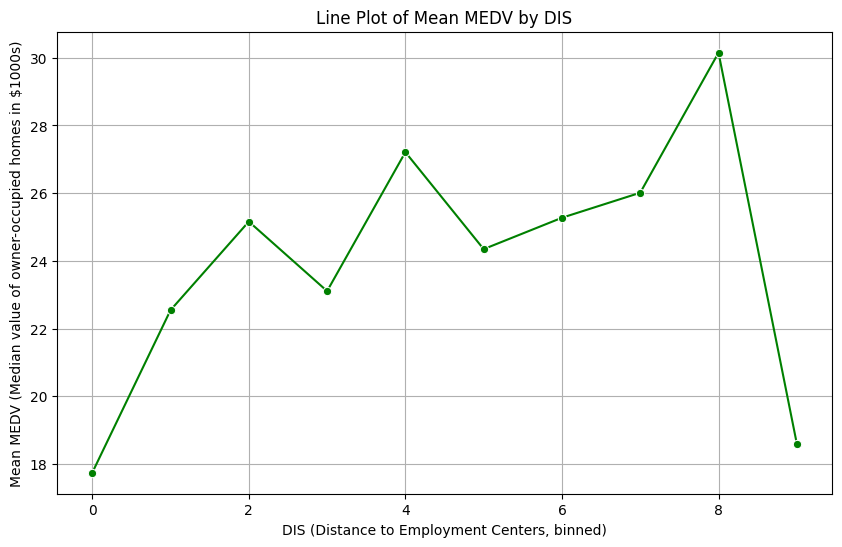

In [54]:
# Bin the 'dis' variable into discrete categories
df['dis_binned'] = pd.cut(df['dis'], bins=10, labels=False) # Use labels=False to get numeric bin identifiers

# Calculate the mean 'medv' for each 'dis' bin
medv_means_dis = df.groupby('dis_binned')['medv'].mean().reset_index()

# Create a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='dis_binned', y='medv', data=medv_means_dis, marker='o', color='green')
plt.title("Line Plot of Mean MEDV by DIS")
plt.xlabel("DIS (Distance to Employment Centers, binned)")
plt.ylabel("Mean MEDV (Median value of owner-occupied homes in $1000s)")
plt.grid(True)
plt.show()

In [55]:
df.drop(columns=['dis_binned'], inplace=True)

In [56]:
df.columns

Index(['ID', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

###rad

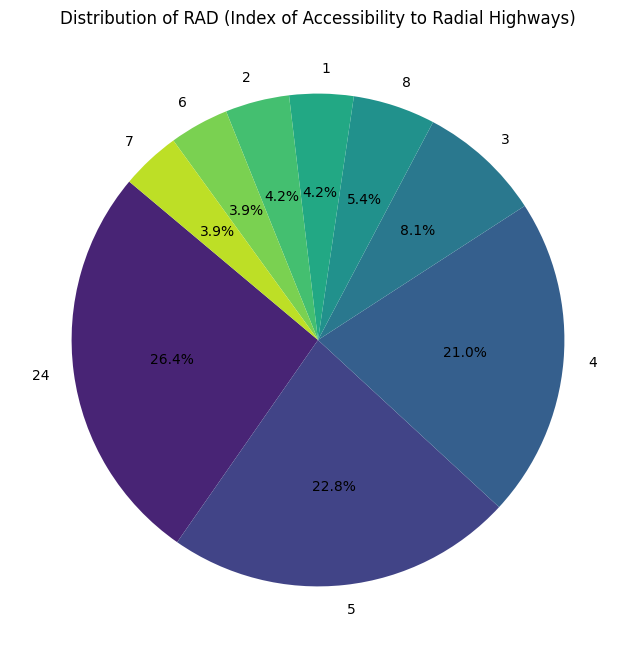

In [57]:
# Calculate the distribution of 'rad'
rad_counts = df['rad'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(rad_counts, labels=rad_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(rad_counts)))
plt.title("Distribution of RAD (Index of Accessibility to Radial Highways)")
plt.show()

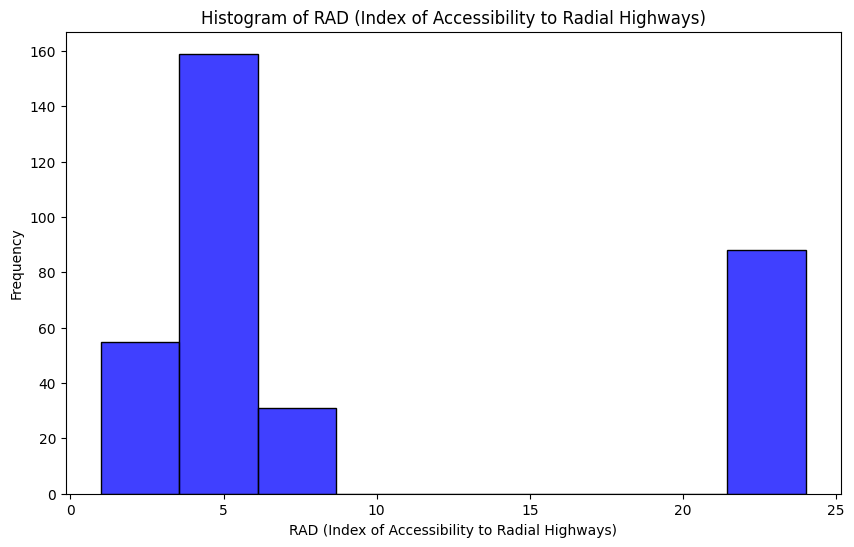

In [58]:
# Create a histogram to show the distribution of 'rad'
plt.figure(figsize=(10, 6))
sns.histplot(df['rad'], bins=len(df['rad'].unique()), kde=False, color='blue')
plt.title("Histogram of RAD (Index of Accessibility to Radial Highways)")
plt.xlabel("RAD (Index of Accessibility to Radial Highways)")
plt.ylabel("Frequency")
plt.show()

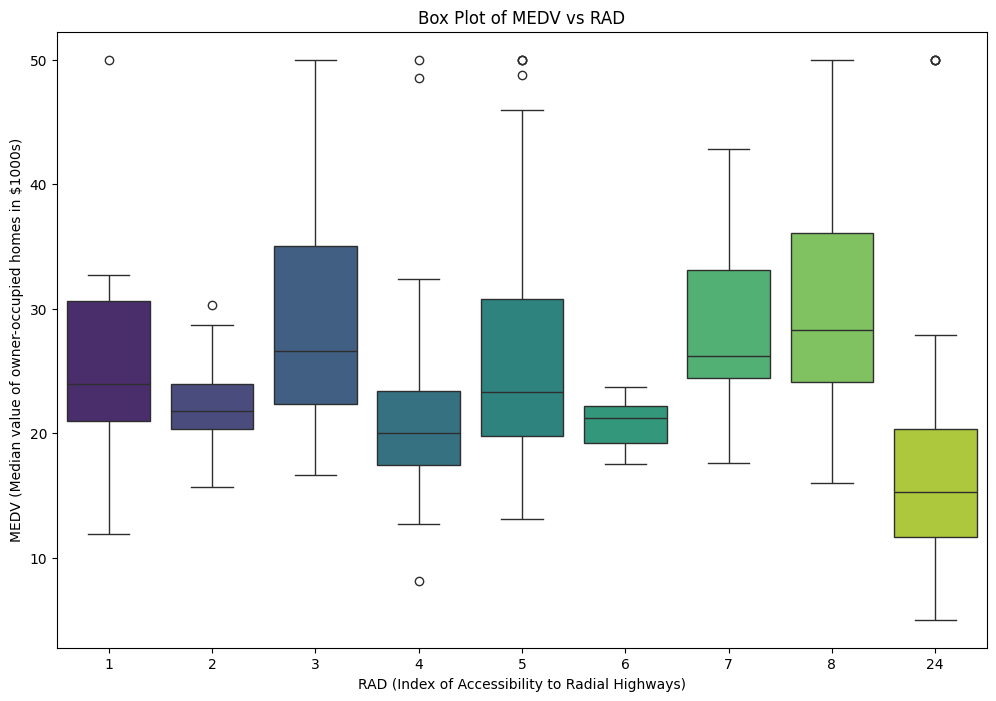

In [59]:
# Box plot of MEDV vs RAD
plt.figure(figsize=(12, 8))
sns.boxplot(x='rad', y='medv', data=df, palette='viridis')
plt.title("Box Plot of MEDV vs RAD")
plt.xlabel("RAD (Index of Accessibility to Radial Highways)")
plt.ylabel("MEDV (Median value of owner-occupied homes in $1000s)")
plt.show()

In [60]:
# Calculate the mean 'medv' for each 'rad' value
medv_means_rad = df.groupby('rad')['medv'].mean().reset_index()
medv_means_rad

rad       medv
0    1  25.935714
1    2  22.257143
2    3  28.896296
3    4  20.938571
4    5  26.013158
5    6  20.707692
6    7  28.000000
7    8  30.566667
8   24  17.056818

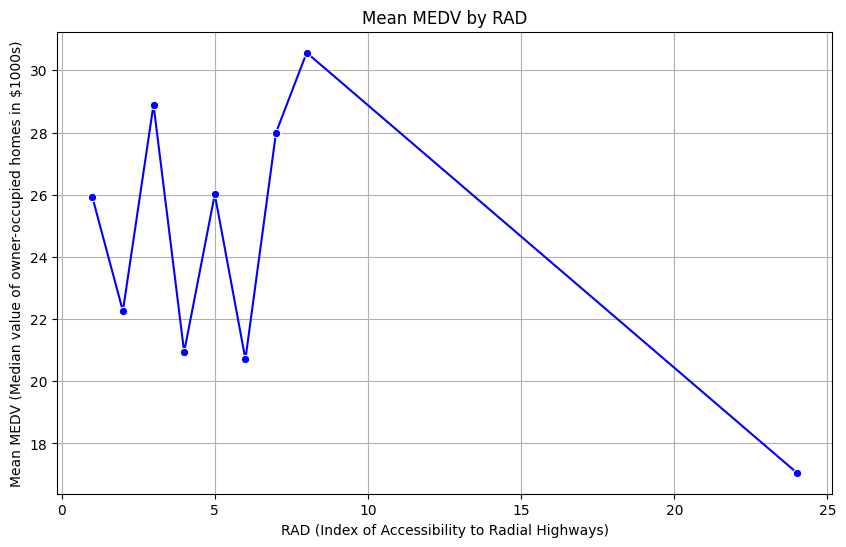

In [61]:
# Calculate the mean 'medv' for each 'rad' value
medv_means_rad = df.groupby('rad')['medv'].mean().reset_index()
# Create a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='rad', y='medv', data=medv_means_rad, marker='o', color='blue')
plt.title("Mean MEDV by RAD")
plt.xlabel("RAD (Index of Accessibility to Radial Highways)")
plt.ylabel("Mean MEDV (Median value of owner-occupied homes in $1000s)")
plt.grid(True)
plt.show()

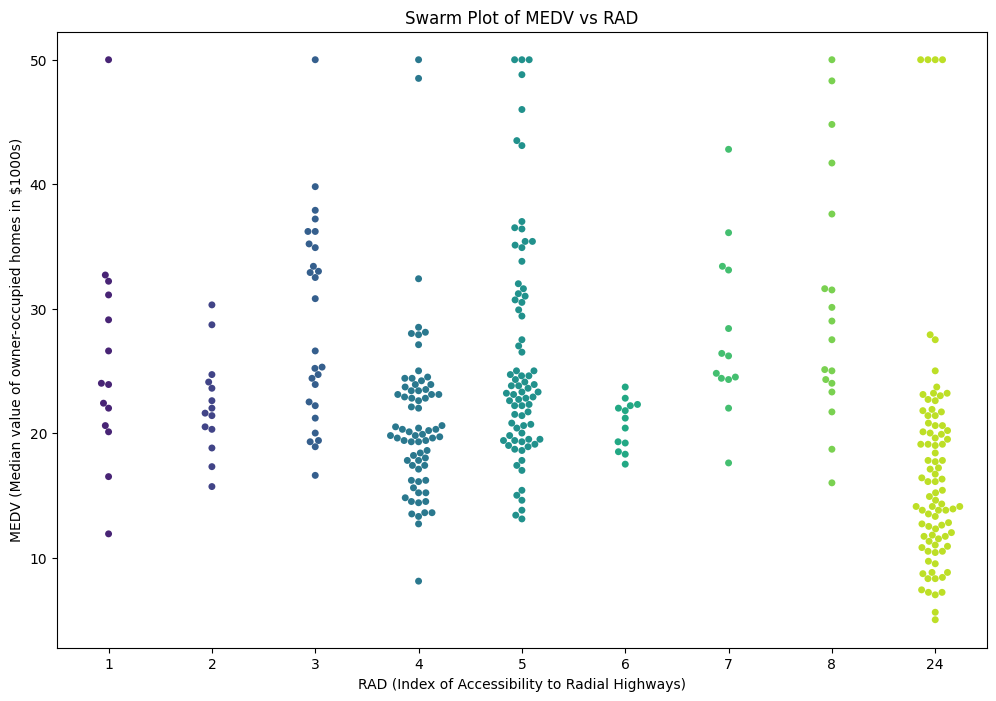

In [62]:
# Create a swarmplot to show the distribution of 'medv' across 'rad'
plt.figure(figsize=(12, 8))
sns.swarmplot(x='rad', y='medv', data=df, palette='viridis')
plt.title("Swarm Plot of MEDV vs RAD")
plt.xlabel("RAD (Index of Accessibility to Radial Highways)")
plt.ylabel("MEDV (Median value of owner-occupied homes in $1000s)")
plt.show()

###tax

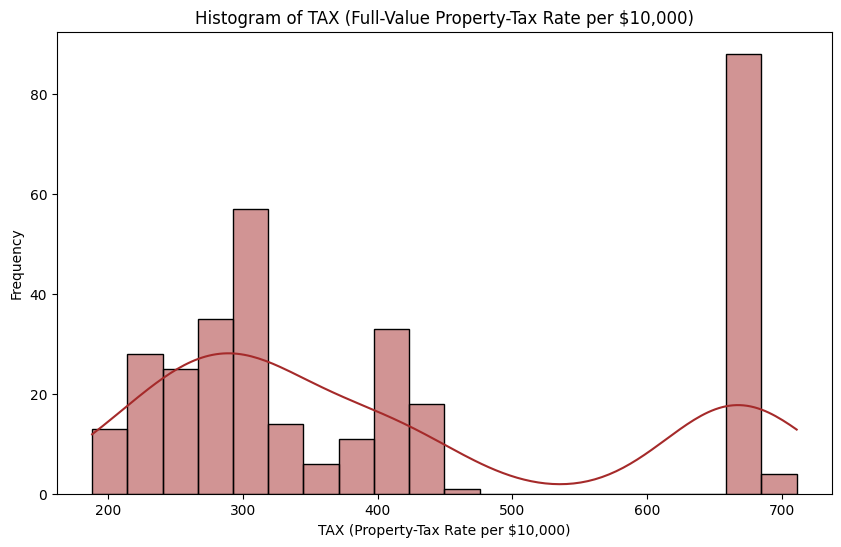

In [63]:
# Histogram to show the distribution of 'tax'
plt.figure(figsize=(10, 6))
sns.histplot(df['tax'], bins=20, kde=True, color='brown')
plt.title("Histogram of TAX (Full-Value Property-Tax Rate per $10,000)")
plt.xlabel("TAX (Property-Tax Rate per $10,000)")
plt.ylabel("Frequency")
plt.show()

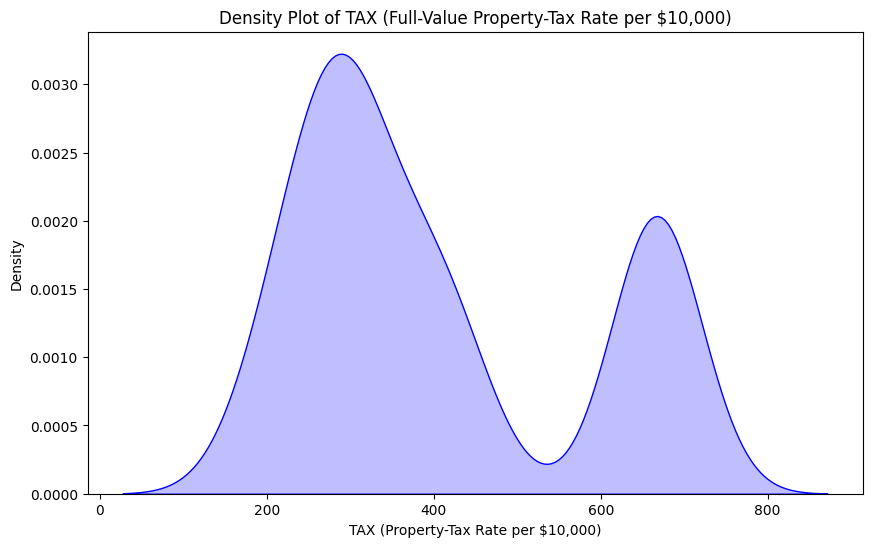

In [64]:
# Density plot to show the distribution of 'tax'
plt.figure(figsize=(10, 6))
sns.kdeplot(df['tax'], shade=True, color='blue')
plt.title("Density Plot of TAX (Full-Value Property-Tax Rate per $10,000)")
plt.xlabel("TAX (Property-Tax Rate per $10,000)")
plt.ylabel("Density")
plt.show()

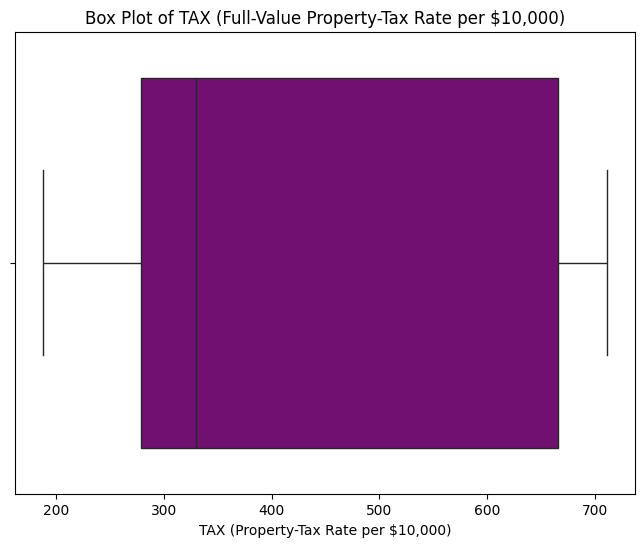

In [65]:
# Box plot to show the distribution of 'tax'
plt.figure(figsize=(8, 6))
sns.boxplot(x='tax', data=df, color='purple')
plt.title("Box Plot of TAX (Full-Value Property-Tax Rate per $10,000)")
plt.xlabel("TAX (Property-Tax Rate per $10,000)")
plt.show()

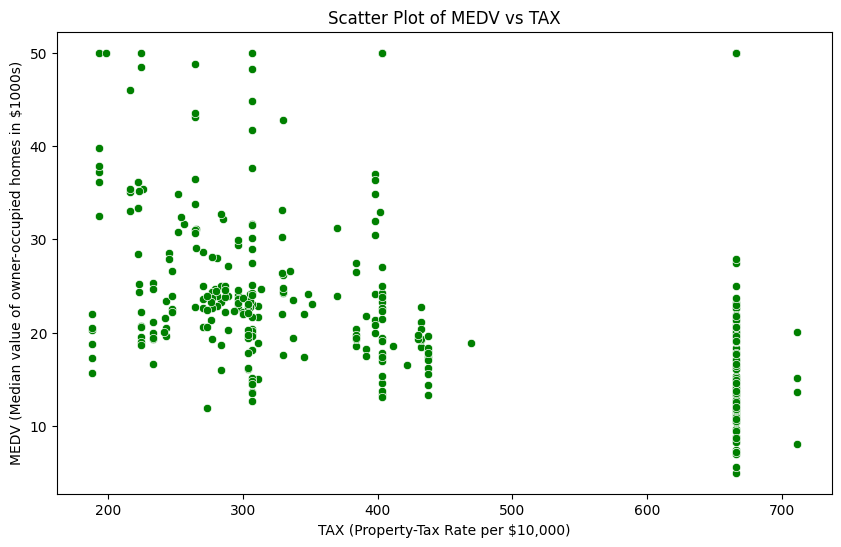

In [66]:
# Scatter plot to show the relationship between 'tax' and 'medv'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tax', y='medv', data=df, color='green')
plt.title("Scatter Plot of MEDV vs TAX")
plt.xlabel("TAX (Property-Tax Rate per $10,000)")
plt.ylabel("MEDV (Median value of owner-occupied homes in $1000s)")
plt.show()

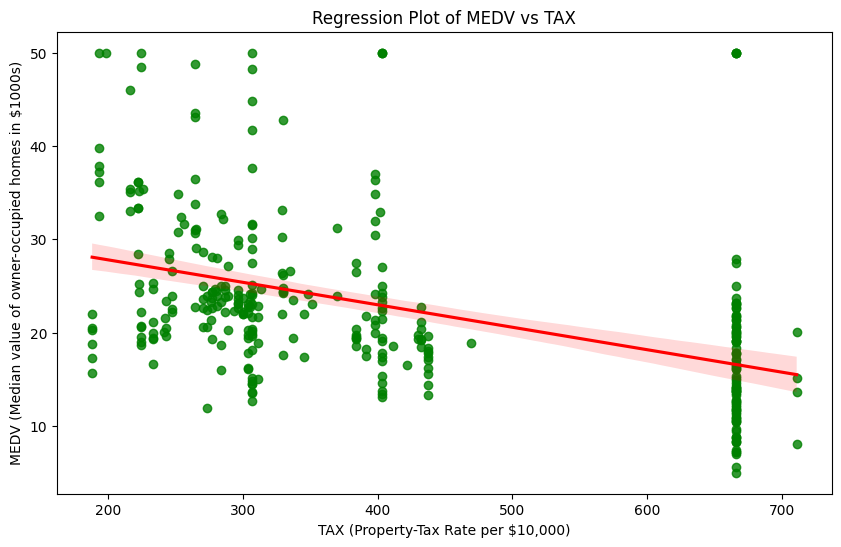

In [67]:
# Regression plot to show the relationship between 'tax' and 'medv'
plt.figure(figsize=(10, 6))
sns.regplot(x='tax', y='medv', data=df, scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.title("Regression Plot of MEDV vs TAX")
plt.xlabel("TAX (Property-Tax Rate per $10,000)")
plt.ylabel("MEDV (Median value of owner-occupied homes in $1000s)")
plt.show()

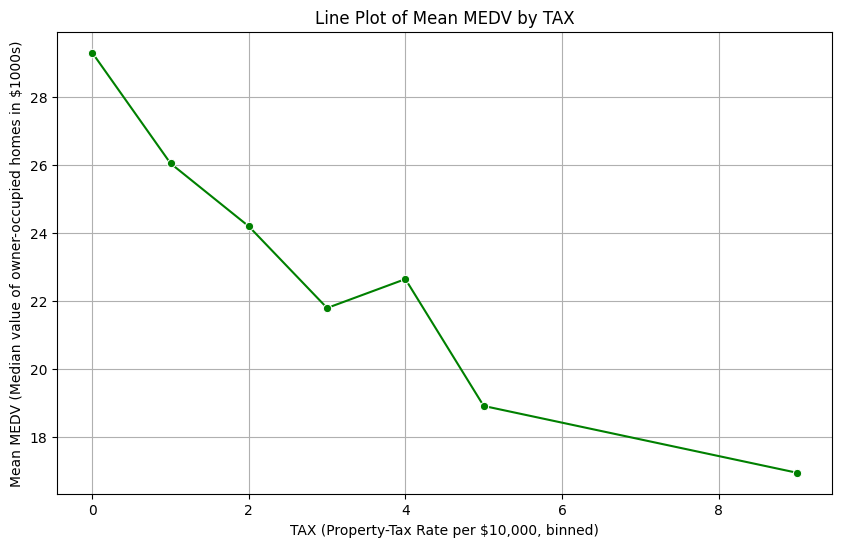

In [68]:
# Bin the 'tax' variable into discrete categories
df['tax_binned'] = pd.cut(df['tax'], bins=10, labels=False) # Use labels=False to get numeric bin identifiers

# Calculate the mean 'medv' for each 'tax' bin
medv_means_tax = df.groupby('tax_binned')['medv'].mean().reset_index()

# Create a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='tax_binned', y='medv', data=medv_means_tax, marker='o', color='green')
plt.title("Line Plot of Mean MEDV by TAX")
plt.xlabel("TAX (Property-Tax Rate per $10,000, binned)")
plt.ylabel("Mean MEDV (Median value of owner-occupied homes in $1000s)")
plt.grid(True)
plt.show()

In [69]:
df.drop(columns=['tax_binned'], inplace=True)

In [70]:
df.columns

Index(['ID', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

###ptratio

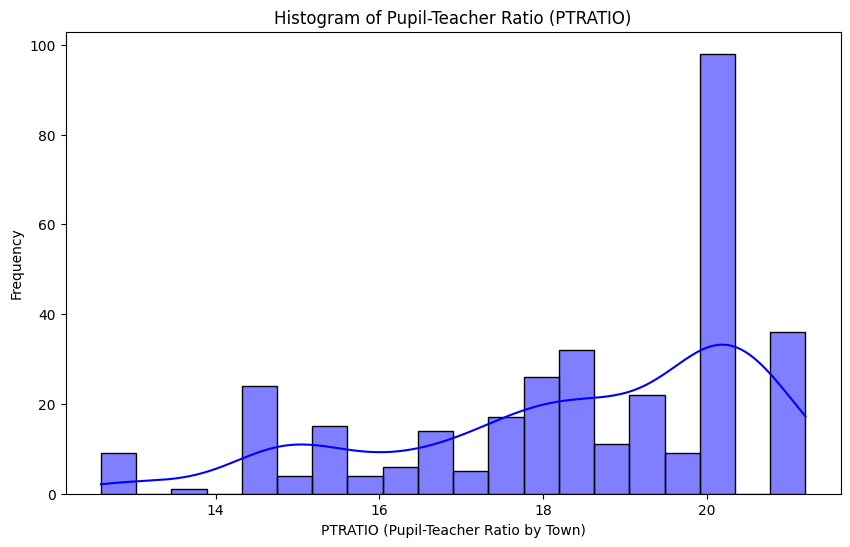

In [71]:
# Histogram to show the distribution of 'ptratio'
plt.figure(figsize=(10, 6))
sns.histplot(df['ptratio'], bins=20, kde=True, color='blue')
plt.title("Histogram of Pupil-Teacher Ratio (PTRATIO)")
plt.xlabel("PTRATIO (Pupil-Teacher Ratio by Town)")
plt.ylabel("Frequency")
plt.show()

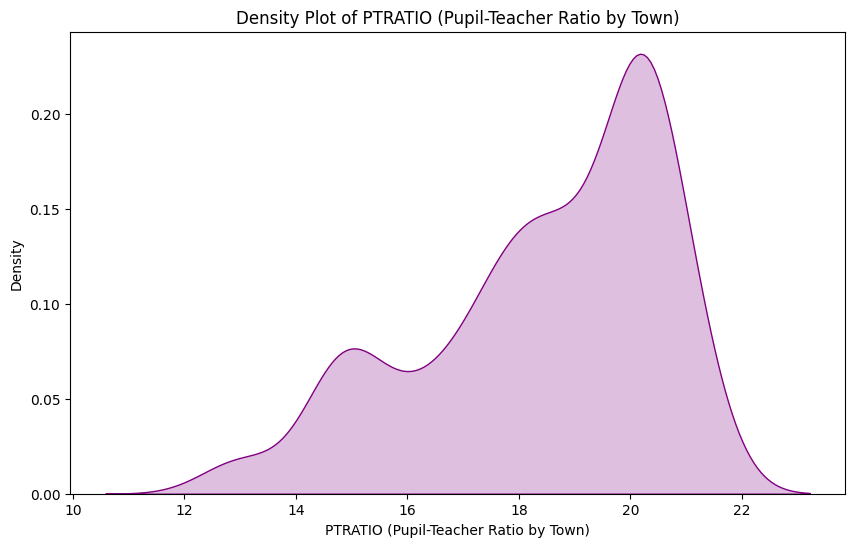

In [72]:
# Density plot to show the distribution of 'ptratio'
plt.figure(figsize=(10, 6))
sns.kdeplot(df['ptratio'], shade=True, color='purple')
plt.title("Density Plot of PTRATIO (Pupil-Teacher Ratio by Town)")
plt.xlabel("PTRATIO (Pupil-Teacher Ratio by Town)")
plt.ylabel("Density")
plt.show()

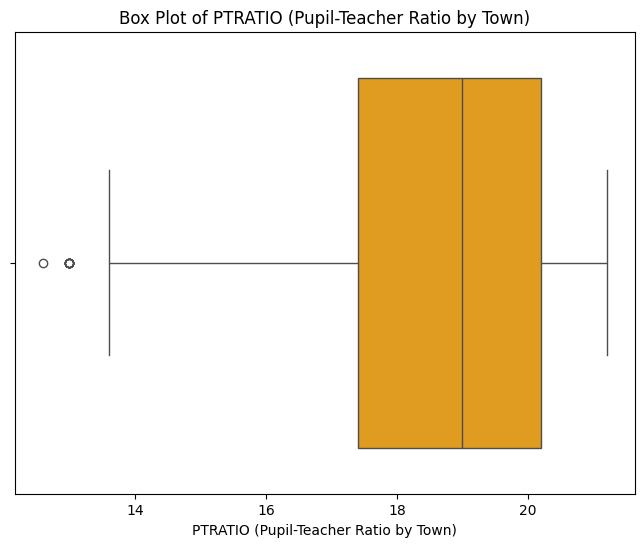

In [73]:
# Box plot to show the distribution of 'ptratio'
plt.figure(figsize=(8, 6))
sns.boxplot(x='ptratio', data=df, color='orange')
plt.title("Box Plot of PTRATIO (Pupil-Teacher Ratio by Town)")
plt.xlabel("PTRATIO (Pupil-Teacher Ratio by Town)")
plt.show()

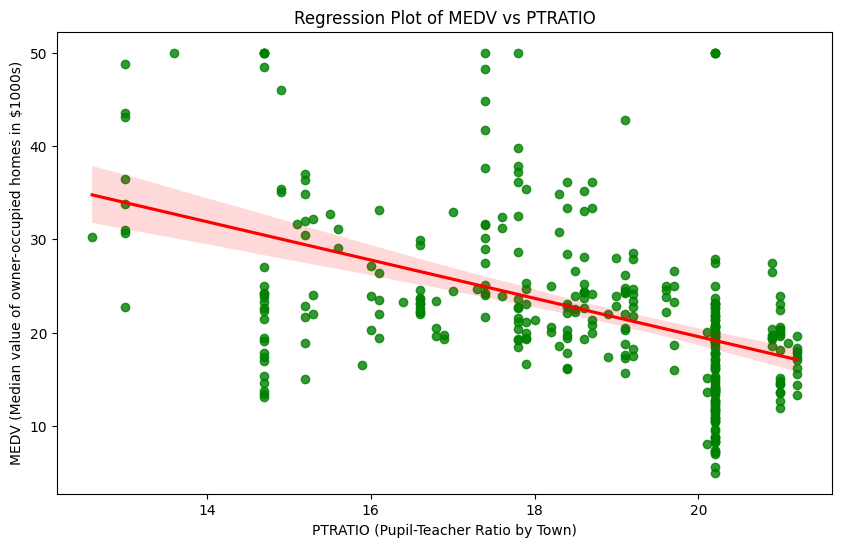

In [74]:
# Regression plot to show the relationship between 'ptratio' and 'medv'
plt.figure(figsize=(10, 6))
sns.regplot(x='ptratio', y='medv', data=df, scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.title("Regression Plot of MEDV vs PTRATIO")
plt.xlabel("PTRATIO (Pupil-Teacher Ratio by Town)")
plt.ylabel("MEDV (Median value of owner-occupied homes in $1000s)")
plt.show()

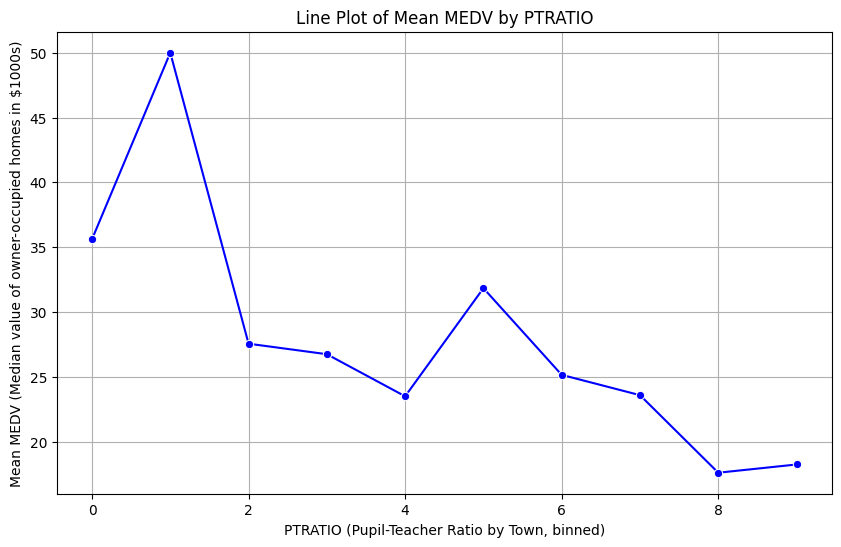

In [75]:
# Bin the 'ptratio' variable into discrete categories
df['ptratio_binned'] = pd.cut(df['ptratio'], bins=10, labels=False) # Assign numerical labels to bins

# Calculate the mean 'medv' for each 'ptratio' bin
medv_means_ptratio = df.groupby('ptratio_binned')['medv'].mean().reset_index()

# Create a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='ptratio_binned', y='medv', data=medv_means_ptratio, marker='o', color='blue')
plt.title("Line Plot of Mean MEDV by PTRATIO")
plt.xlabel("PTRATIO (Pupil-Teacher Ratio by Town, binned)")
plt.ylabel("Mean MEDV (Median value of owner-occupied homes in $1000s)")
plt.grid(True)
plt.show()

In [76]:
df.drop(columns=['ptratio_binned'], inplace=True)

In [77]:
df.columns

Index(['ID', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

###lstat

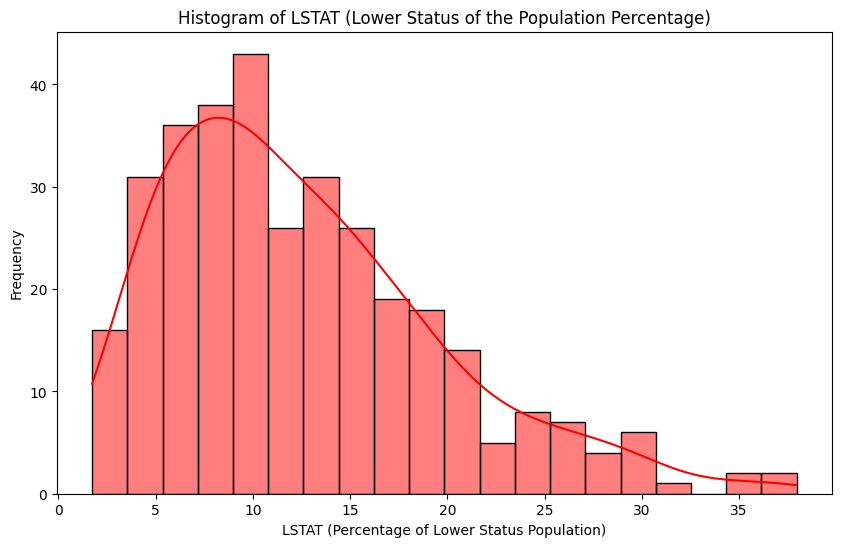

In [78]:
# Histogram to show the distribution of 'lstat'
plt.figure(figsize=(10, 6))
sns.histplot(df['lstat'], bins=20, kde=True, color='red')
plt.title("Histogram of LSTAT (Lower Status of the Population Percentage)")
plt.xlabel("LSTAT (Percentage of Lower Status Population)")
plt.ylabel("Frequency")
plt.show()

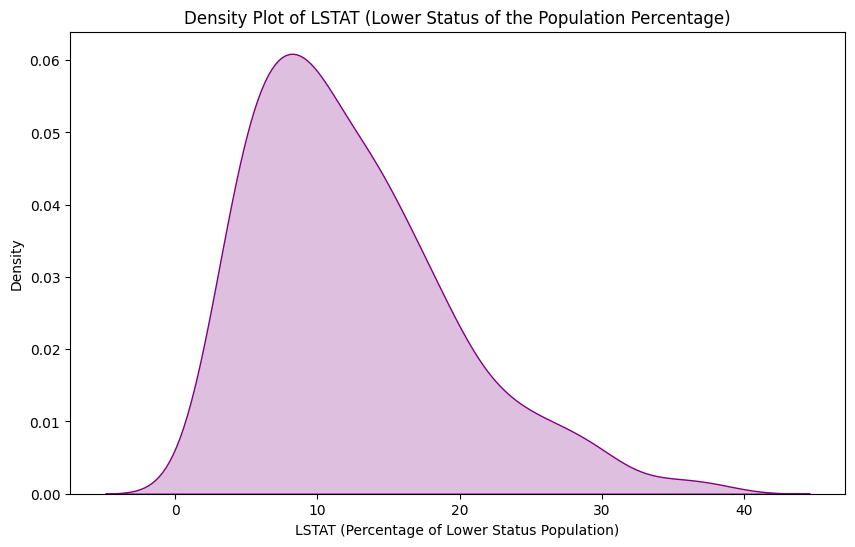

In [79]:
# Density plot to show the distribution of 'lstat'
plt.figure(figsize=(10, 6))
sns.kdeplot(df['lstat'], shade=True, color='purple')
plt.title("Density Plot of LSTAT (Lower Status of the Population Percentage)")
plt.xlabel("LSTAT (Percentage of Lower Status Population)")
plt.ylabel("Density")
plt.show()

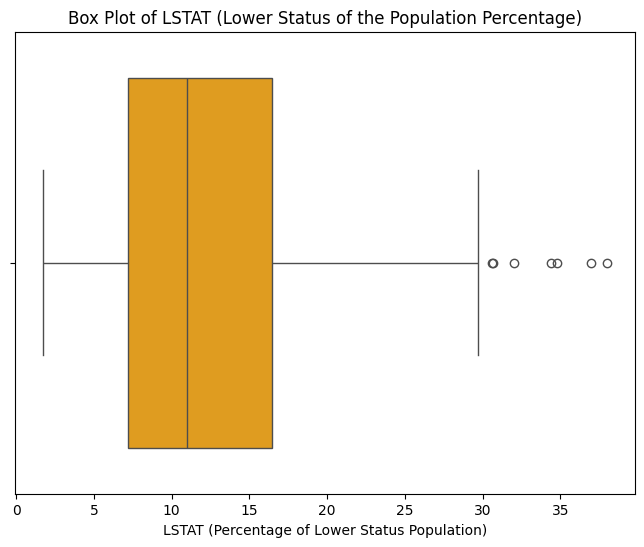

In [80]:
# Box plot to show the distribution of 'lstat'
plt.figure(figsize=(8, 6))
sns.boxplot(x='lstat', data=df, color='orange')
plt.title("Box Plot of LSTAT (Lower Status of the Population Percentage)")
plt.xlabel("LSTAT (Percentage of Lower Status Population)")
plt.show()

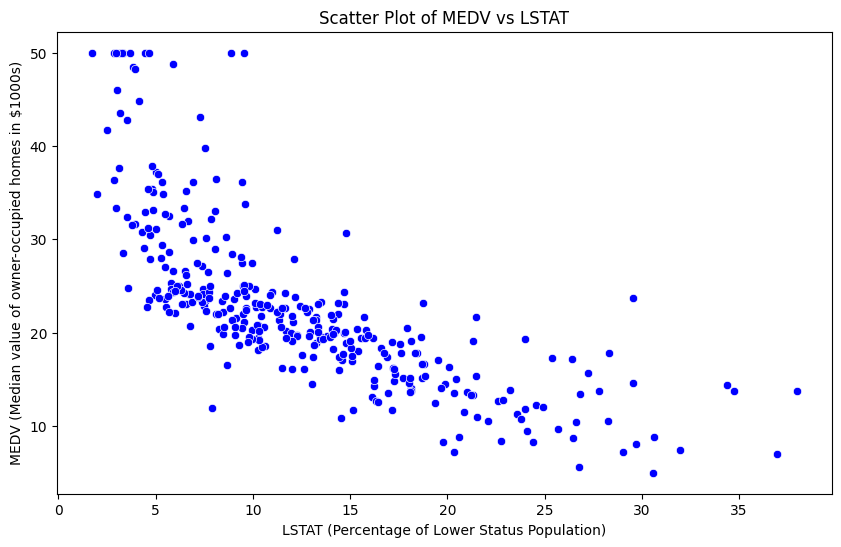

In [81]:
# Scatter plot to show the relationship between 'lstat' and 'medv'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='lstat', y='medv', data=df, color='blue')
plt.title("Scatter Plot of MEDV vs LSTAT")
plt.xlabel("LSTAT (Percentage of Lower Status Population)")
plt.ylabel("MEDV (Median value of owner-occupied homes in $1000s)")
plt.show()

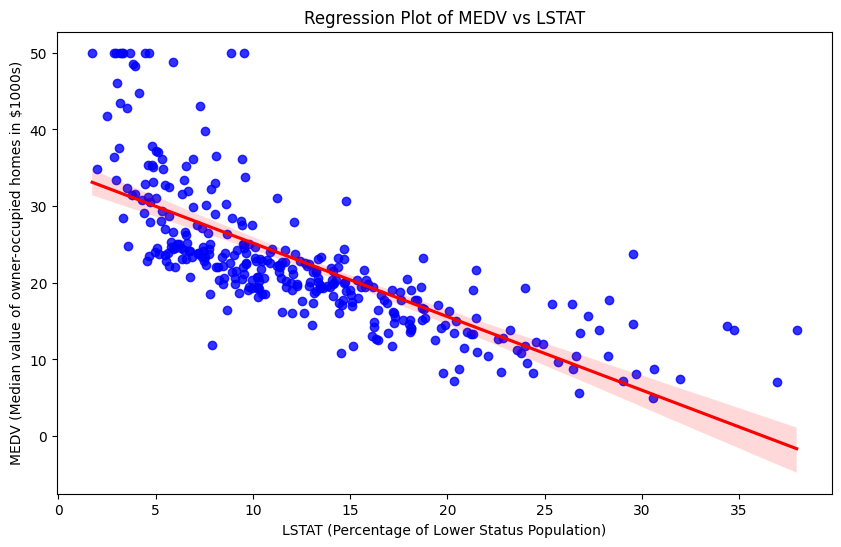

In [82]:
# Regression plot to show the relationship between 'lstat' and 'medv'
plt.figure(figsize=(10, 6))
sns.regplot(x='lstat', y='medv', data=df, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title("Regression Plot of MEDV vs LSTAT")
plt.xlabel("LSTAT (Percentage of Lower Status Population)")
plt.ylabel("MEDV (Median value of owner-occupied homes in $1000s)")
plt.show()

<Axes: xlabel='lstat_binned', ylabel='medv'>

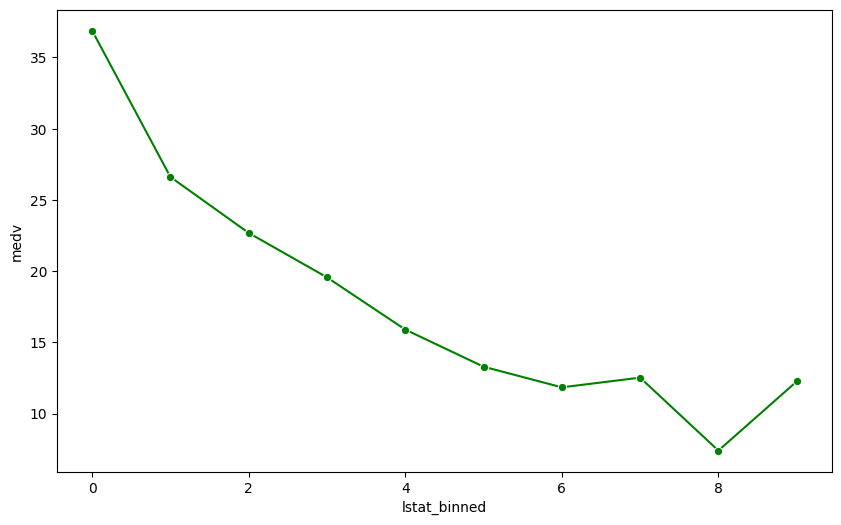

In [83]:
# Bin the 'lstat' variable into discrete categories
df['lstat_binned'] = pd.cut(df['lstat'], bins=10, labels=False) # Use labels=False for numerical categories

# Calculate the mean 'medv' for each 'lstat' bin
medv_means_lstat = df.groupby('lstat_binned')['medv'].mean().reset_index()

# Create a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='lstat_binned', y='medv', data=medv_means_lstat, marker='o', color='green')


In [84]:
df.drop(columns=['lstat_binned'], inplace=True)

In [85]:
df.columns

Index(['ID', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

##5.Predictive Modeling

###Model Training

####Data Preparating

In [86]:
# Prepare the features (X) and target (y)
X = df.drop(columns=['ID','medv'])
y = df['medv']

In [87]:
# Identify categorical and numerical columns
numerical_cols = ['indus', 'nox', 'rm', 'age', 'dis', 'tax', 'ptratio', 'lstat']
categorical_cols = ['chas', 'rad']

In [88]:
# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  # Standardize numerical features
        ('cat', OneHotEncoder(), categorical_cols)  # Dummy encode categorical features
    ])

In [89]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

####Model Selection and Training

In [90]:
# List of models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Elastic Net Regression': ElasticNet(),
    'Polynomial Regression': make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
    'Support Vector Regression (SVR)': SVR(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(random_state=42),
    'K-Nearest Neighbors Regression (KNN)': KNeighborsRegressor(),
    'Bayesian Ridge Regression': BayesianRidge(),
    'Huber Regression': HuberRegressor(),
    'Quantile Regression': QuantileRegressor(),
    'Principal Component Regression (PCR)': make_pipeline(PCA(), LinearRegression()),
    'Partial Least Squares Regression (PLS)': PLSRegression(),
    'Theil-Sen Estimator': TheilSenRegressor(),
    'RANSAC Regression': RANSACRegressor(),
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'Gradient Boosting Machines (GBM)': GradientBoostingRegressor(random_state=42),
    'XGBoost': xgb.XGBRegressor(random_state=42),
    'LightGBM': lgb.LGBMRegressor(random_state=42),
    'CatBoost': cb.CatBoostRegressor(verbose=0, random_state=42),
    'HistGradientBoosting': HistGradientBoostingRegressor(random_state=42),
    'Stochastic Gradient Boosting': GradientBoostingRegressor(subsample=0.5, random_state=42),
    'Quantile Boosting': GradientBoostingRegressor(loss='quantile', random_state=42)
}


In [91]:
# Function to train and evaluate each model
results = {'Model': [], 'MAE': [], 'MSE': [], 'R-squared': []}

for model_name, model in models.items():
    # Set the solver for QuantileRegressor to 'highs'
    if model_name == 'Quantile Regression':
        model.set_params(solver='highs')

    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    results['Model'].append(model_name)
    results['MAE'].append(mean_absolute_error(y_test, y_pred))
    results['MSE'].append(mean_squared_error(y_test, y_pred))
    results['R-squared'].append(r2_score(y_test, y_pred))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000225 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 266, number of used features: 12
[LightGBM] [Info] Start training from score 22.868421
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

###Model Evaluation

In [92]:
# Convert results to DataFrame
results_df = pd.DataFrame(results)
results_df.sort_values(by='R-squared', ascending= False, inplace=True)

# Display the results
results_df

Model       MAE         MSE  R-squared
17        Gradient Boosting Machines (GBM)  1.947902    6.883463   0.923516
22            Stochastic Gradient Boosting  1.993467    7.249634   0.919447
21                    HistGradientBoosting  2.215243    8.315498   0.907604
7                 Random Forest Regression  2.181090    8.853533   0.901626
19                                LightGBM  2.291186    9.361977   0.895976
16                                AdaBoost  2.721069   11.249734   0.875001
20                                CatBoost  2.294140   12.999046   0.855564
8     K-Nearest Neighbors Regression (KNN)  2.903881   20.121313   0.776426
18                                 XGBoost  2.756957   21.254233   0.763838
10                        Huber Regression  3.423657   22.686421   0.747924
9                Bayesian Ridge Regression  3.612513   23.085266   0.743492
1                         Ridge Regression  3.667091   23.475671   0.739155
0                        Linear Regression  3.690098   23.664227   0.737059
12    Principal Component Regression (PCR)  3.690098   23.664227   0.737059
14                     Theil-Sen Estimator  3.467395   24.795942   0.724485
13  Partial Least Squares Regression (PLS)  3.658853   26.060797   0.710430
15                       RANSAC Regression  3.879941   26.486274   0.705703
2                         Lasso Regression  3.763181   27.102617   0.698854
6                 Decision Tree Regression  3.352239   28.204478   0.686611
3                   Elastic Net Regression  3.882277   29.951765   0.667197
5          Support Vector Regression (SVR)  3.436888   32.096174   0.643369
23                       Quantile Boosting  4.543998   33.329653   0.629664
11                     Quantile Regression  6.810448   90.760746  -0.008471
4                    Polynomial Regression  5.620814  165.505309  -0.838981

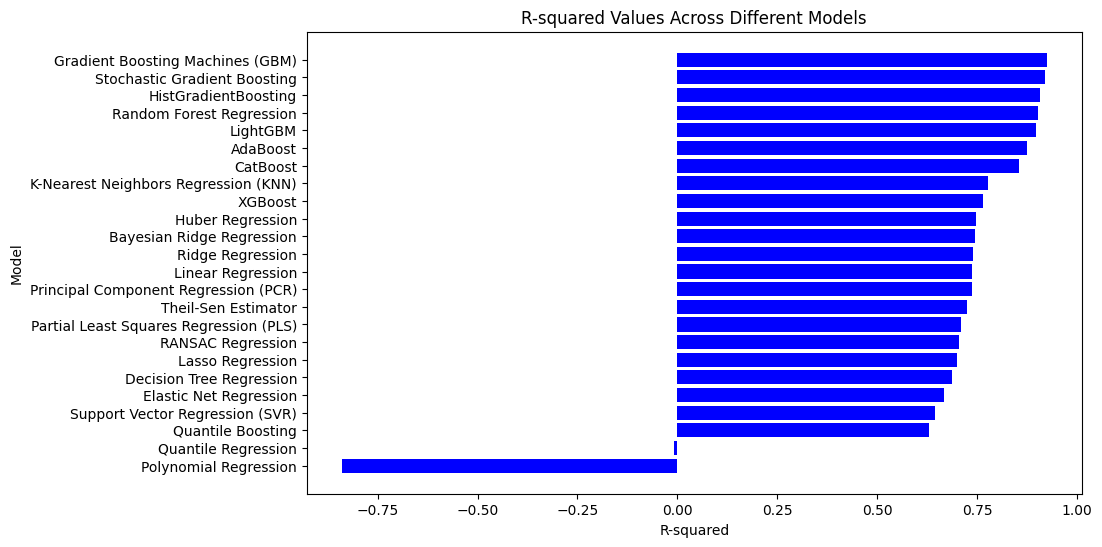

In [93]:
plt.figure(figsize=(10, 6))
plt.barh(results_df['Model'], results_df['R-squared'], color='blue')
plt.xlabel('R-squared')
plt.ylabel('Model')
plt.title('R-squared Values Across Different Models')
plt.gca().invert_yaxis()  # Invert y-axis to have the best model on top
plt.show()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000045 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 266, number of used features: 12
[LightGBM] [Info] Start training from score 22.868421
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

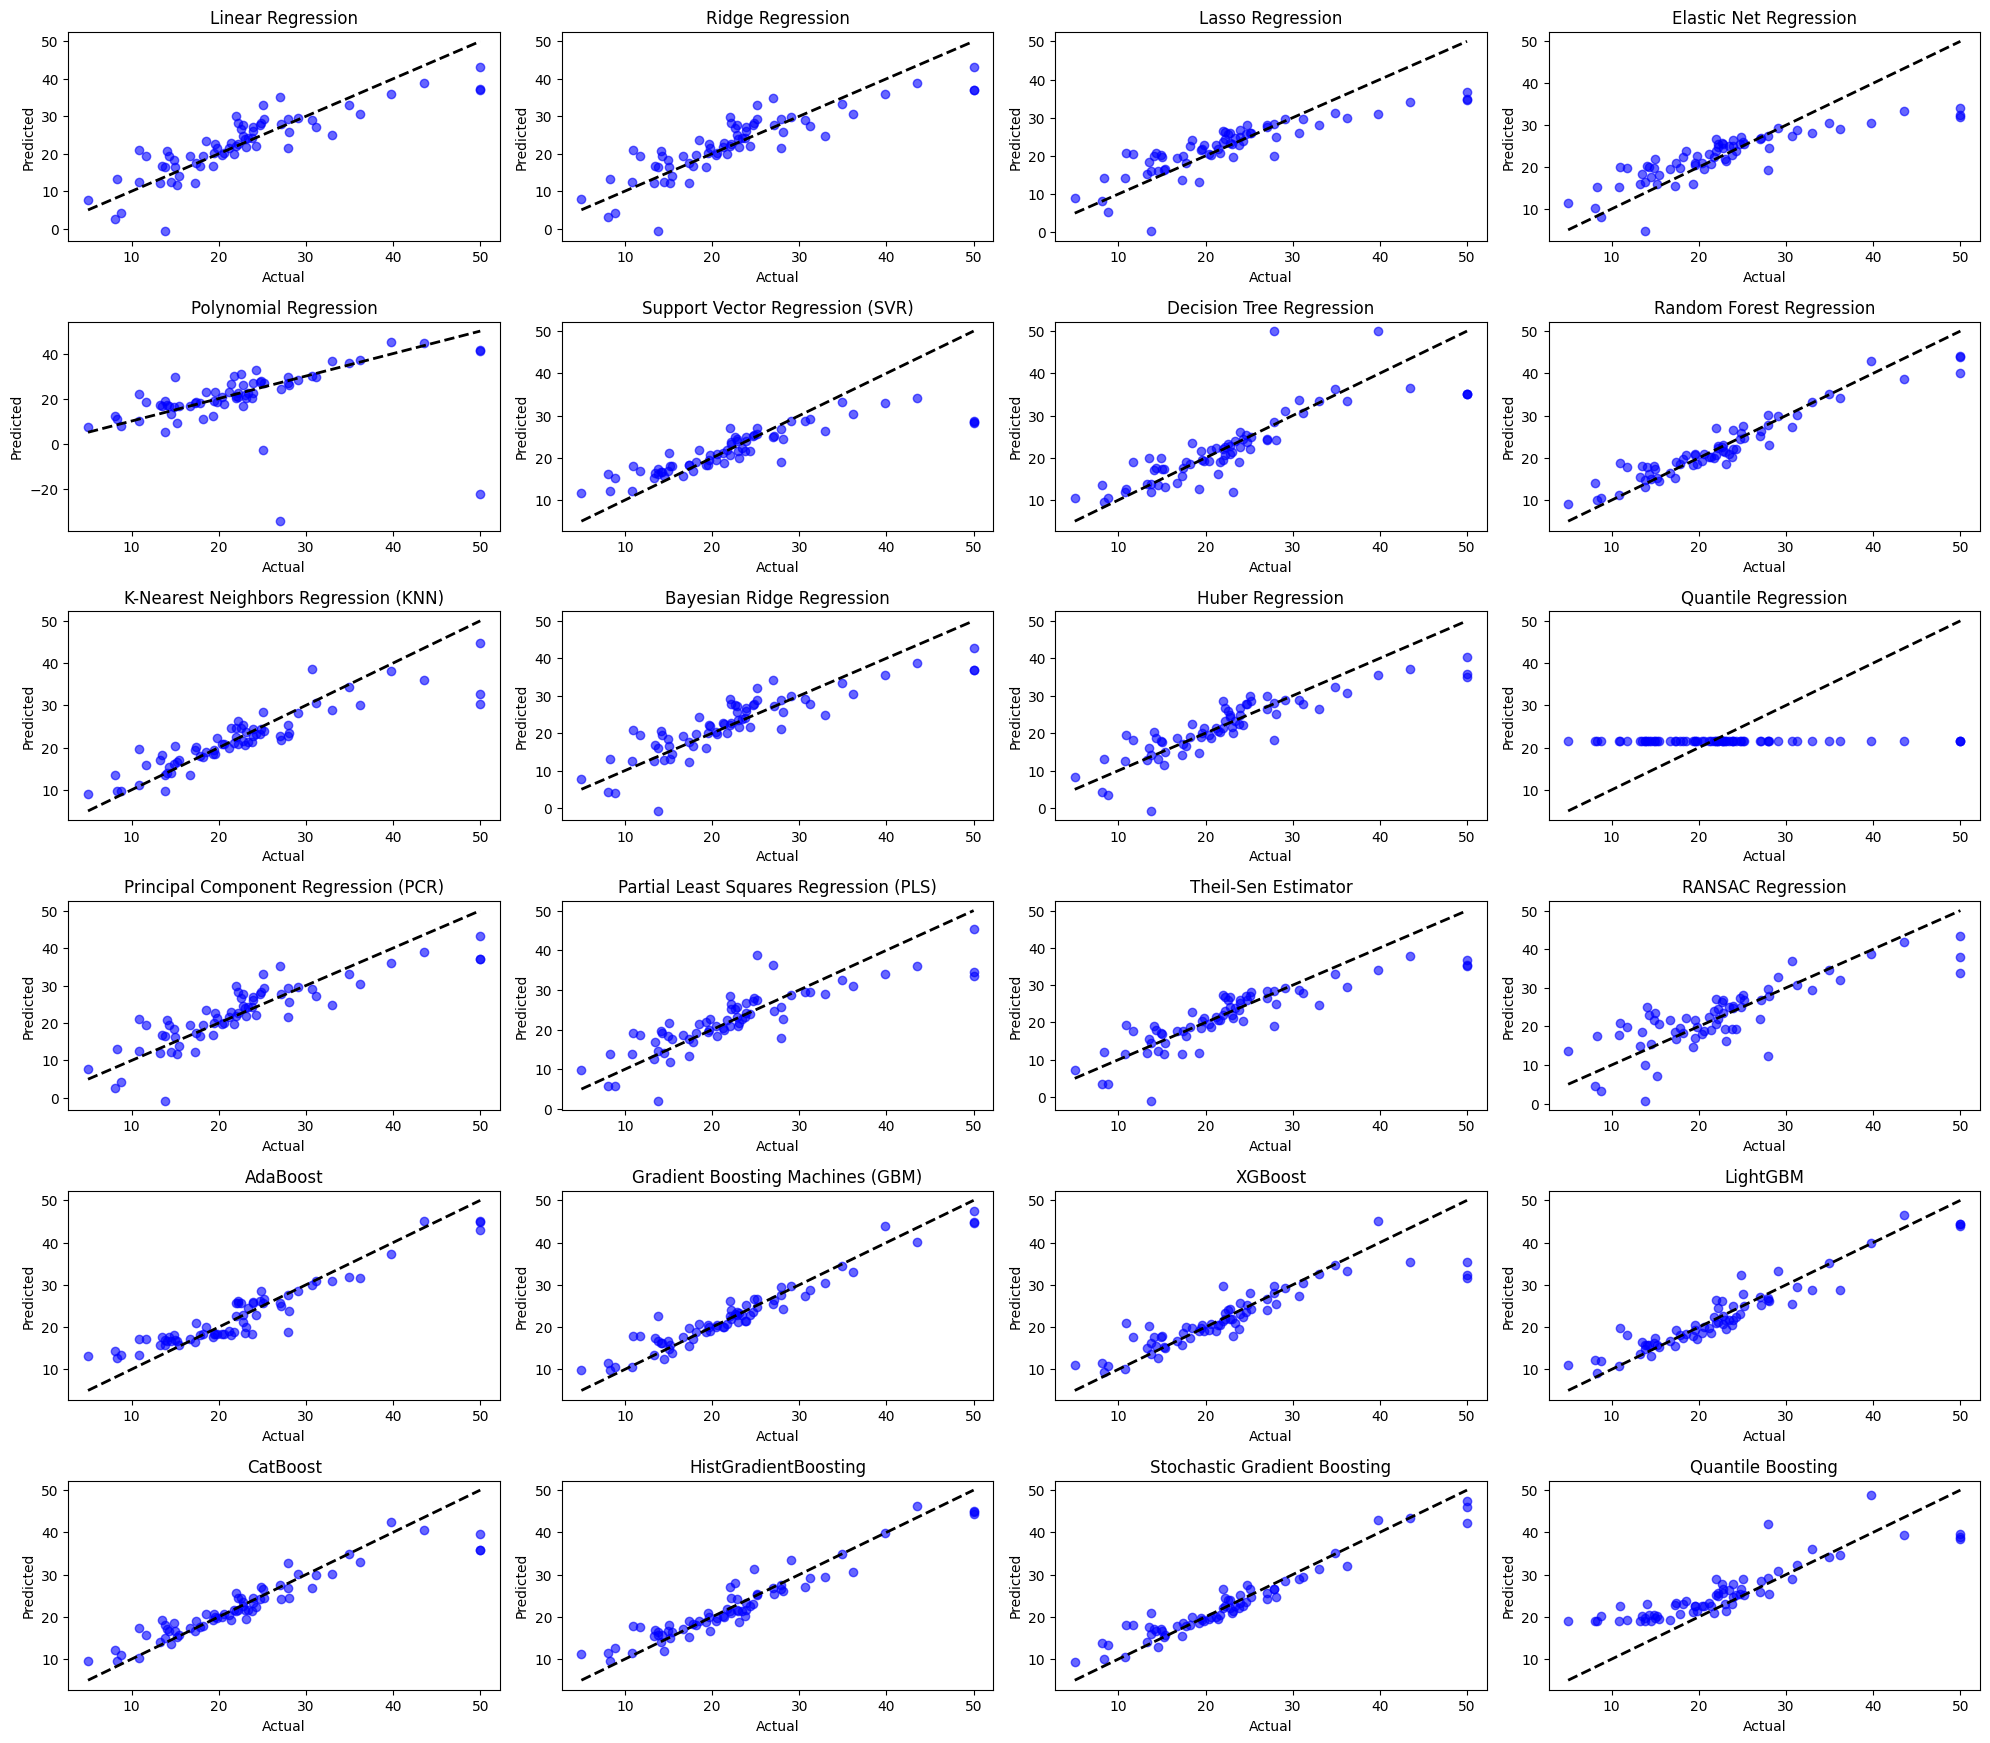

In [94]:
# Plotting the results
plt.figure(figsize=(20, 20))
n_models = len(models)
n_cols = 4
n_rows = (n_models // n_cols) + 1

for i, (model_name, model) in enumerate(models.items(), 1):
    # Pipeline for preprocessing and model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    pipeline.fit(X_train, y_train)

    # Generate predictions on the test data
    y_test_pred = pipeline.predict(X_test)

    # Subplot for each model
    plt.subplot(n_rows, n_cols, i)
    plt.scatter(y_test, y_test_pred, alpha=0.6, color='b')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(model_name)

plt.tight_layout()
plt.show()

###Best Model

####Hyperparameter Tuning

#####Gradient Boosting Machines (GBM)

In [100]:
# Initialize and train the GBM model
gbm = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm.fit(X_train, y_train)

# Make predictions
y_pred_gbm = gbm.predict(X_test)

# Evaluate the model
mae_gbm = mean_absolute_error(y_test, y_pred_gbm)
mse_gbm = mean_squared_error(y_test, y_pred_gbm)
r2_gbm = r2_score(y_test, y_pred_gbm)

print(f"Mean Absolute Error: {mae_gbm}")
print(f"Mean Squared Error: {mse_gbm}")
print(f"R-squared: {r2_gbm}")

Mean Absolute Error: 1.9291066432224677
Mean Squared Error: 6.516796014589328
R-squared: 0.9275898541938317


In [101]:
df_y = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred_gbm})
df_y.head(10)

y_test     y_pred
25     24.7  23.188419
309    19.6  19.812425
73     19.8  19.072994
195    27.9  27.813629
57     23.9  21.048273
296    13.5  17.483818
281    11.7  17.654815
180    30.7  28.051857
211    17.8  17.354122
197    27.1  25.973928

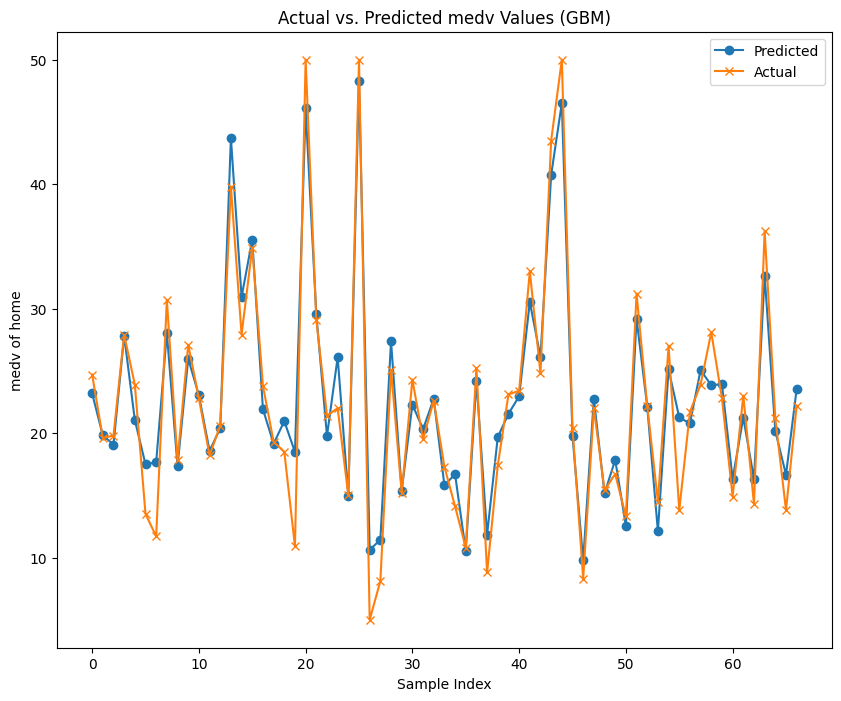

In [102]:
plt.figure(figsize=(10, 8))

plt.plot(y_pred_gbm, label='Predicted', linestyle='-', marker='o')
plt.plot(y_test.values, label='Actual', linestyle='-', marker='x')
plt.ylabel("medv of home")
plt.xlabel("Sample Index")
plt.title("Actual vs. Predicted medv Values (GBM)")
plt.legend()
plt.show()

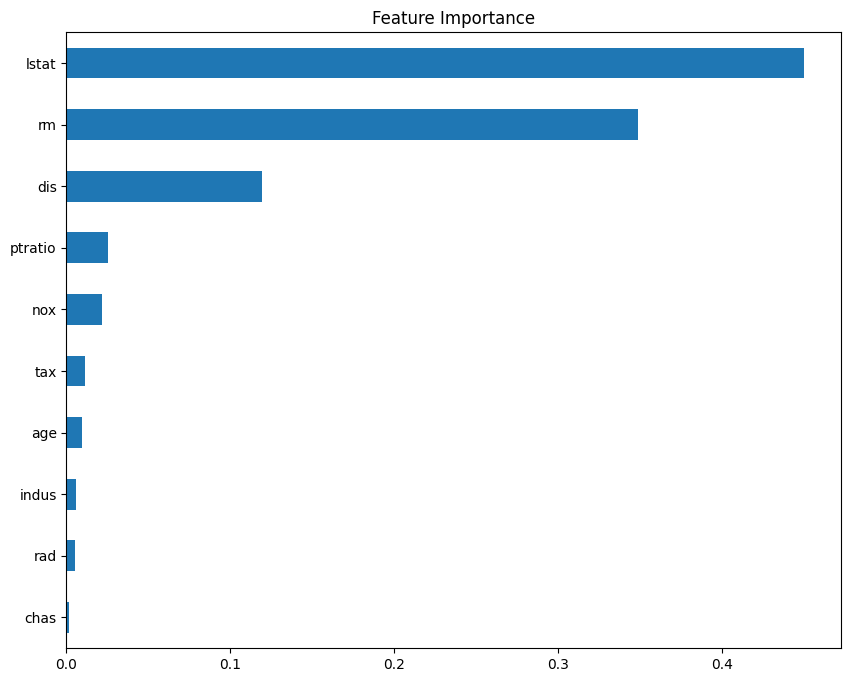

In [103]:
# Plot Feature Importance
feature_importances = pd.Series(gbm.feature_importances_, index=X.columns)
# Sort the feature importances in descending order and plot a horizontal bar chart
feature_importances.sort_values(ascending=True).plot(kind='barh', figsize=(10, 8))
plt.title("Feature Importance")
plt.show()

####Checking Overfitting

#####Gradient Boosting Machines (GBM)

In [104]:
# Training performance
y_train_pred_gm = gbm.predict(X_train)
train_mse_gm = mean_squared_error(y_train, y_train_pred_gm)
train_r2_gm = r2_score(y_train, y_train_pred_gm)

# Testing performance
y_test_pred_gm = gbm.predict(X_test)
test_mse_gm = mean_squared_error(y_test, y_test_pred_gm)
test_r2_gm = r2_score(y_test, y_test_pred_gm)

print(f"Training MSE: {train_mse_gm}, R-squared: {train_r2_gm}")
print(f"Testing MSE: {test_mse_gm}, R-squared: {test_r2_gm}")

Training MSE: 1.411626374555631, R-squared: 0.9828507844997846
Testing MSE: 6.516796014589328, R-squared: 0.9275898541938317


#####Stochastic Gradient Boosting

In [106]:
# Instantiate the model
sgb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, subsample=0.5, max_depth=3, random_state=42)

# Train the model
sgb.fit(X_train, y_train)

# Predict and evaluate
y_train_pred_sgb = sgb.predict(X_train)
y_test_pred_sgb = sgb.predict(X_test)

# Metrics
train_mse_sgb = mean_squared_error(y_train, y_train_pred_sgb)
train_r2_sgb = r2_score(y_train, y_train_pred_sgb)
test_mse_sgb = mean_squared_error(y_test, y_test_pred_sgb)
test_r2_sgb = r2_score(y_test, y_test_pred_sgb)

print(f"Training MSE: {train_mse_sgb:.4f}, R-squared: {train_r2_sgb:.4f}")
print(f"Testing MSE: {test_mse_sgb:.4f}, R-squared: {test_r2_sgb:.4f}")

Training MSE: 1.7598, R-squared: 0.9786
Testing MSE: 7.5764, R-squared: 0.9158


#####HistGradientBoosting

In [107]:
# Instantiate the model
hgb = HistGradientBoostingRegressor(max_iter=100, learning_rate=0.1, max_depth=10, max_bins=255, random_state=42)

# Train the model
hgb.fit(X_train, y_train)

# Predict and evaluate
y_train_pred_hgb = hgb.predict(X_train)
y_test_pred_hgb = hgb.predict(X_test)

# Metrics
train_mse_hgb = mean_squared_error(y_train, y_train_pred_hgb)
train_r2_hgb = r2_score(y_train, y_train_pred_hgb)
test_mse_hgb = mean_squared_error(y_test, y_test_pred_hgb)
test_r2_hgb = r2_score(y_test, y_test_pred_hgb)

print(f"Training MSE: {train_mse_hgb:.4f}, R-squared: {train_r2_hgb:.4f}")
print(f"Testing MSE: {test_mse_hgb:.4f}, R-squared: {test_r2_hgb:.4f}")

Training MSE: 3.1000, R-squared: 0.9623
Testing MSE: 8.1923, R-squared: 0.9090


#####Random Forest Regression

In [108]:
# Instantiate the model
rf = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict and evaluate
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

# Metrics
train_mse_rf = mean_squared_error(y_train, y_train_pred_rf)
train_r2_rf = r2_score(y_train, y_train_pred_rf)
test_mse_rf = mean_squared_error(y_test, y_test_pred_rf)
test_r2_rf = r2_score(y_test, y_test_pred_rf)

print(f"Training MSE: {train_mse_rf:.4f}, R-squared: {train_r2_rf:.4f}")
print(f"Testing MSE: {test_mse_rf:.4f}, R-squared: {test_r2_rf:.4f}")

Training MSE: 1.6731, R-squared: 0.9797
Testing MSE: 8.8862, R-squared: 0.9013


##6.Conclusion

Based on the performance metrics of various regression models, **Gradient Boosting Machines (GBM)** emerged as the best model. It achieved the lowest Mean Absolute Error (MAE) of 1.947902, the lowest Mean Squared Error (MSE) of 6.883463, and the highest R-squared (R²) value of 0.923516. These results indicate that GBM provides the most accurate and reliable predictions, making it the top choice among the models evaluated for your regression task. Other models like **Stochastic Gradient Boosting**, **HistGradientBoosting**, and **Random Forest Regression** also performed well but did not match the overall effectiveness of GBM.